# Yorkshire Water -yhtiön julkaisemat vedenkäyttötilastot vuosilta 2012-2015

* Tätä dokumenttia voi käyttää sellaisenaan **CRISP-DM -tehtävissä (1-5)** ongelman, datan ja datan valmistelun analysoinnissa
   * Tässä Jupyter Notebookissa olevia numeroita ei kannata suoraan verrata sanallisten tehtävien numerointiin
* Voit myös muokata dokumentteja ja lisätä lisää uusia koodisoluja omaa analyysia varten
* Lisäksi useissa tehtävissä on suhteellisen helppo vaihtaa esim. tarkasteltava kiinteistö tai kiinteistöt:

       kiinteisto = '338'  # vaihdetaan toinen kiinteistö
Mutta tästä dokumentista pitäisi olla joka tapauksessa aika paljon hyötyä tehtävien 1-5 tekemisessä, joten sitä kannattaa tutkia tarkemmin ennen näiden tehtävien aloittamista.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
# df = pd.read_csv("Data/Yorkshire_external_meter_readings_combined_2012_2015.csv", index_col=0)

DataFrameen df on koottu Yorkshiren alueen kiinteistöistä kerättyä dataa päivittäisestä vedenkäytöstä vuosilta 2012 - 2015. Yksittäisessä numeroidussa sarakkeessa on yhden kiinteistön vesidata ajanjaksolta 1.1.2012 -31.12.2015.

Huomaa, että datassa esiintyy kiinteistönumeroita väliltä 1-2158. Yksittäisiä kiinteistönumeroita saattaa kuitenkin puuttua. Datassa esiintyvät kiinteistönumerot saat näkyville ajamalla alla olevan solun koodin "Koodi 0".

In [230]:
#Koodi 0: DataFramen df kiinteistönumerot

properties = df.columns[1:2086]
print(properties)


Index(['1', '2', '3', '5', '6', '7', '8', '10', '11', '12',
       ...
       '2149', '2150', '2151', '2152', '2153', '2154', '2155', '2156', '2157',
       '2158'],
      dtype='object', length=2085)


## Tehtävä 1
    
Kuvaajaan 1 on piirretty yhden kiinteistön vedenkulutus vuosilta 2012-2015. 

Tarkastele kuvaajaan piirtyneitä lukuarvoja ja pohdi mitä kuvaajan alussa ja lopussa näkyvät tasaiset jaksot saattaisivat tarkoittaa?

Huom. Jos haluat muuttaa tarkasteltavaa kiinteistöä, vaihda kiinteistönumero muuttujaan "kiinteisto" heittomerkkien sisään, esim. kiinteisto = '891' ja klikkaa tämän jälkeen notebookin yläreunan painikkeista "Run". <b>Älä poista heittomerkkejä</b>.

In [231]:
df.loc[91:120, :]

,date,1,2,3,5,6,7,8,10,11,...,2154,2155,2156,2157,2158,Year,Month,Day,Week,Weekday
91,2012-04-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.364,0.196,0.199,0.278,-1.0,2012,4,1,13,Sun
92,2012-04-02,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.261,0.113,0.215,0.233,-1.0,2012,4,2,14,Mon
93,2012-04-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.459,0.519,0.345,0.710,-1.0,2012,4,3,14,Tue
94,2012-04-04,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.201,0.251,0.222,0.246,-1.0,2012,4,4,14,Wed
95,2012-04-05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.459,0.283,0.148,0.277,-1.0,2012,4,5,14,Thu
96,2012-04-06,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.146,0.246,0.172,0.383,-1.0,2012,4,6,14,Fri
97,2012-04-07,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.144,0.316,0.205,0.529,-1.0,2012,4,7,14,Sat
98,2012-04-08,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.335,0.312,0.217,0.556,-1.0,2012,4,8,14,Sun
99,2012-04-09,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.258,0.167,0.214,0.260,-1.0,2012,4,9,15,Mon
100,2012-04-10,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.213,0.231,0.346,0.306,-1.0,2012,4,10,15,Tue


### Kuvaaja 1.1: Kiinteistön vedenkäyttö

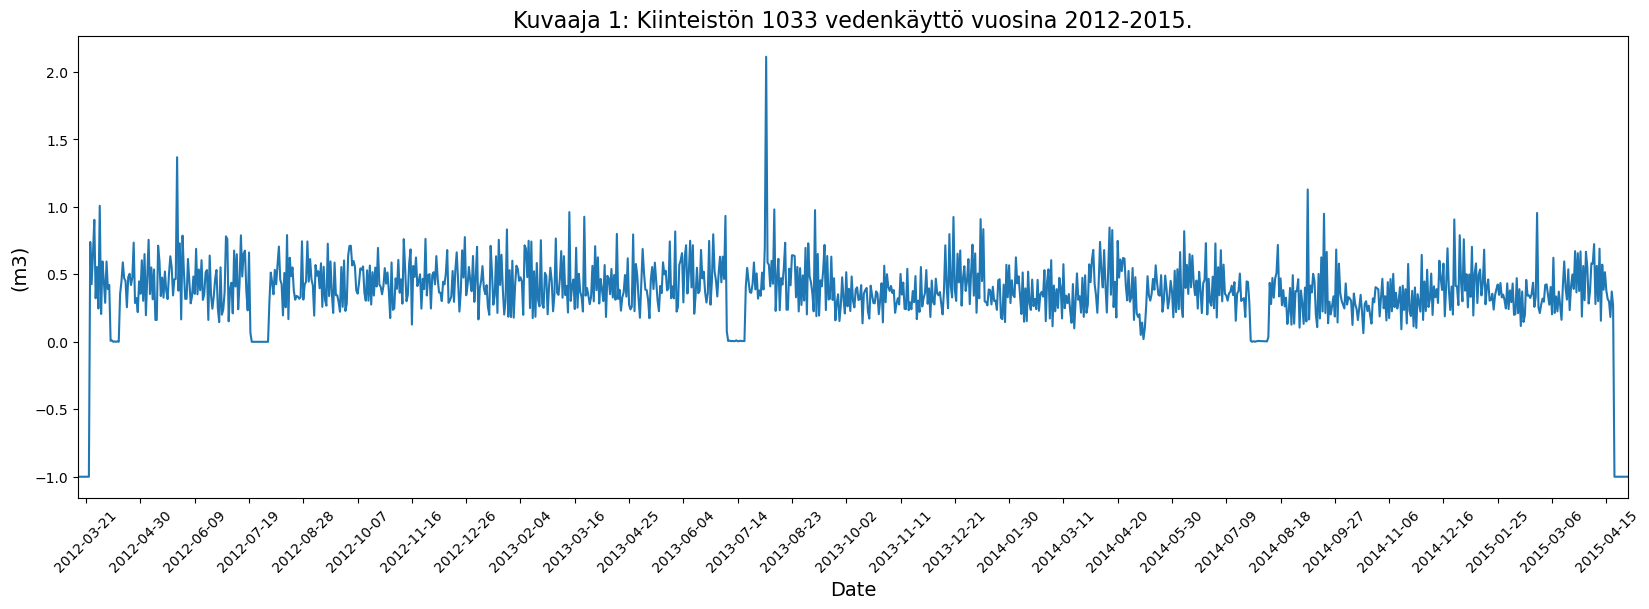

In [274]:
#Kuvaaja 1.1

# kiinteisto = '338'  # vaihdetaan toinen kiinteistö
kiinteisto = '1033'
# kiinteisto = '856'

fig1, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['date'], df[kiinteisto])
ax.set_ylabel('(m3)', size=14)
ax.set_xlabel('Date', size=14)
# ax.set_xlim('2012-01-01', '2015-12-31')
ax.set_xlim('2012-03-15', '2015-05-01')
ax.set_title('Kuvaaja 1: Kiinteistön ' + kiinteisto + ' vedenkäyttö vuosina 2012-2015.', size=16)
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.tick_params(axis='x', rotation=45)

plt.show()

## Tehtävä 2

Dataframen kiinteistönumeroissa (sarakeotsikot) esiintyy kokonaislukujen lisäksi poikkeavia numerointeja, esimerkiksi 835 ja 835.1, 872 ja 872.1, sekä 900 ja 900.1.
Kuvaajassa 2 vertaillaan kahden tällaisen sarakeparin dataa vuosilta _2012-2015_.

Tarkastele kuvaajaa ja keksi selitys datassa esiintyville poikkeaville numeroinneille sekä kuvaajassa näkyvälle ilmiöille (käyrien ajoittuminen ja jälkimmäisessä näkyvä porrastus). 

Huom. Jos muutat kuvaajassa näytettäviä kiinteistöjä, muuta kiinteistönumeroita pareittain. Esim. lukujen '835' ja '835.1' tilalle '931' ja '931.1'. Muuttujaan 'vuosi', voit vaihtaa vuoden 2012, 2013, 2014 tai 2015. Ajamalla Tehtävän 2 koodin 1 saat listan sarakkeista, joissa esiintyy poikkeava numerointi.

In [234]:
#Tehtävä 2.1 - totetustavaihtoehto 1
names = df.filter(like='.').columns.tolist()
names
# len(names)

['835.1',
 '872.1',
 '900.1',
 '931.1',
 '933.1',
 '950.1',
 '958.1',
 '965.1',
 '991.1',
 '992.1',
 '993.1',
 '1035.1',
 '1050.1',
 '1057.1',
 '1067.1',
 '1080.1',
 '1089.1',
 '1092.1',
 '1121.1',
 '1308.1',
 '1402.1',
 '1432.1',
 '1543.1',
 '1563.1',
 '1567.1',
 '1609.1',
 '1631.1',
 '1652.1',
 '1668.1',
 '1741.1',
 '1808.1',
 '1862.1',
 '1886.1',
 '1929.1',
 '1960.1',
 '1976.1',
 '2002.1',
 '2004.1',
 '2083.1',
 '2100.1',
 '2110.1',
 '2122.1',
 '2127.1']

In [235]:
# Tehtävä 2.1 - totetustavaihtoehto 2, yleensä silmukat hitaampia
names2 = [col for col in df.columns if '.' in col]
names2

['835.1',
 '872.1',
 '900.1',
 '931.1',
 '933.1',
 '950.1',
 '958.1',
 '965.1',
 '991.1',
 '992.1',
 '993.1',
 '1035.1',
 '1050.1',
 '1057.1',
 '1067.1',
 '1080.1',
 '1089.1',
 '1092.1',
 '1121.1',
 '1308.1',
 '1402.1',
 '1432.1',
 '1543.1',
 '1563.1',
 '1567.1',
 '1609.1',
 '1631.1',
 '1652.1',
 '1668.1',
 '1741.1',
 '1808.1',
 '1862.1',
 '1886.1',
 '1929.1',
 '1960.1',
 '1976.1',
 '2002.1',
 '2004.1',
 '2083.1',
 '2100.1',
 '2110.1',
 '2122.1',
 '2127.1']

### Kuvaaja 2.1: Kiinteistöjen päivittäinen vedenkulutus kuvaajana

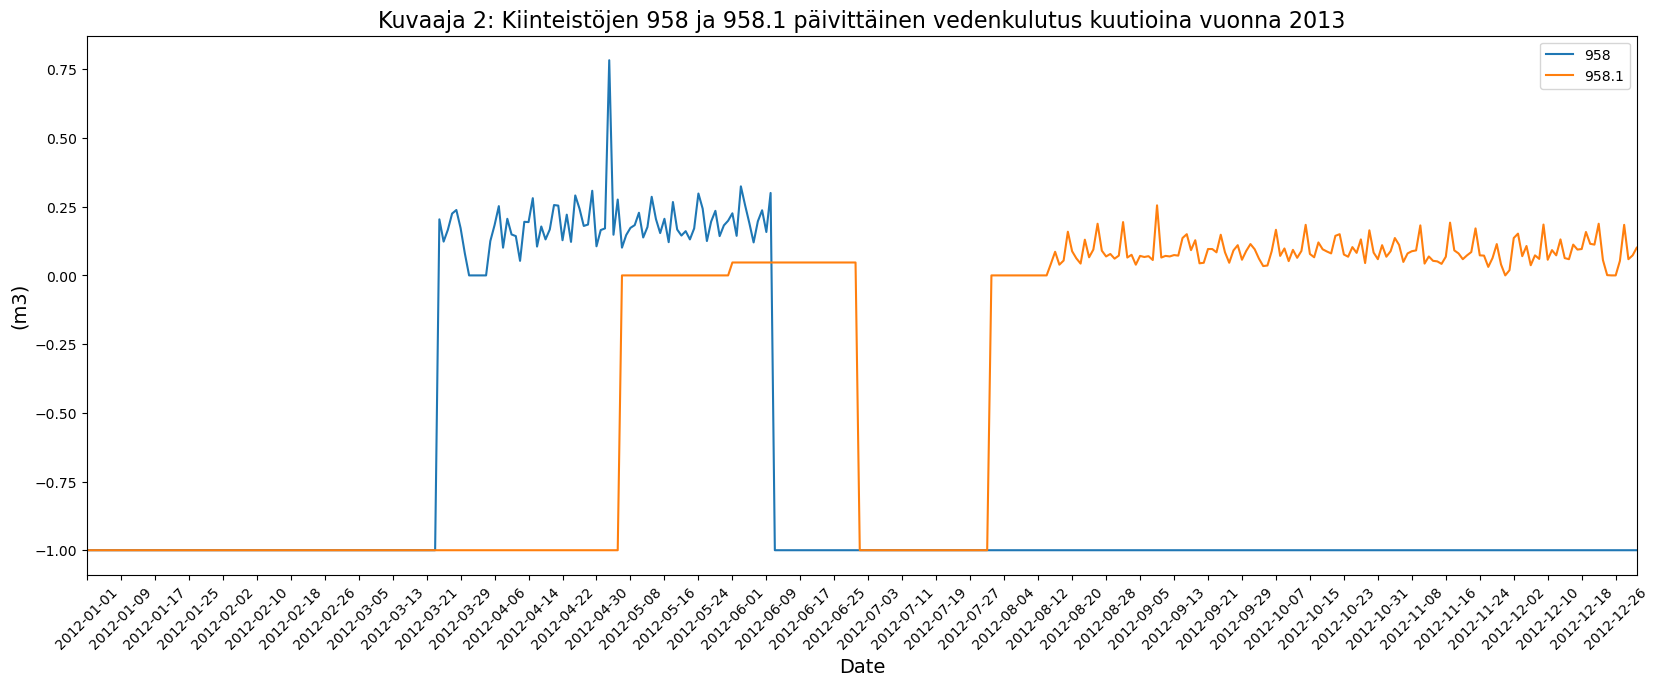

In [256]:
#Kuvaaja 2.1

# kiinteisto1 = '872'
kiinteisto1 = '958'
kiinteisto2 = kiinteisto1 + '.1'
vuosi = '2013'

fig2, ax = plt.subplots(figsize=(20, 7))

ax.plot(df['date'], df[kiinteisto1], label=kiinteisto1)
ax.plot(df['date'], df[kiinteisto2], label=kiinteisto2)

ax.set_title(
    'Kuvaaja 2: Kiinteistöjen ' + kiinteisto1 + ' ja ' + kiinteisto2 + ' päivittäinen vedenkulutus kuutioina vuonna ' + vuosi,
    size=16)
ax.set_ylabel('(m3)', size=14)
ax.set_xlabel('Date', size=14)
ax.set_xlim('2012-01-01', '2012-12-31')
# ax.set_xlim('2013-01-01', '2013-12-31')
ax.xaxis.set_major_locator(plt.MaxNLocator(52))
ax.tick_params(axis='x', rotation=45)
leg = ax.legend()

plt.show()

## Tehtävä 3

Tarkastele kuvaajien **3.1-3.3.** avulla saman kiinteistön vedenkäyttöä ja pohdi ainakin seuraavia asioita:
* mikä voisi selittää vedenkäytössä esiintyvät pidemmät käyttökatkot?
* mikä voisi selittää käyttöpiikit kuvaajissa?
* esiintyykö vedenkäytössä tunnistettavia malleja?
* mitä muita asioita kuvaajista on luettavissa?

#### Kuvaajien **3.1-3.3** selitykset

* Kuvaaja 3.1: Saman kiinteistön vedenkäyttö eri vuosina.
* Kuvaaja 3.2: Saman kiinteistön vedenkäyttö eri kuukausina.
* Kuvaaja 3.3: Saman kiinteistän vedenkäyttö eri viikkoina.


#### Kuvaaja 3.1: Kiinteistön vedenkäyttö vuosittain

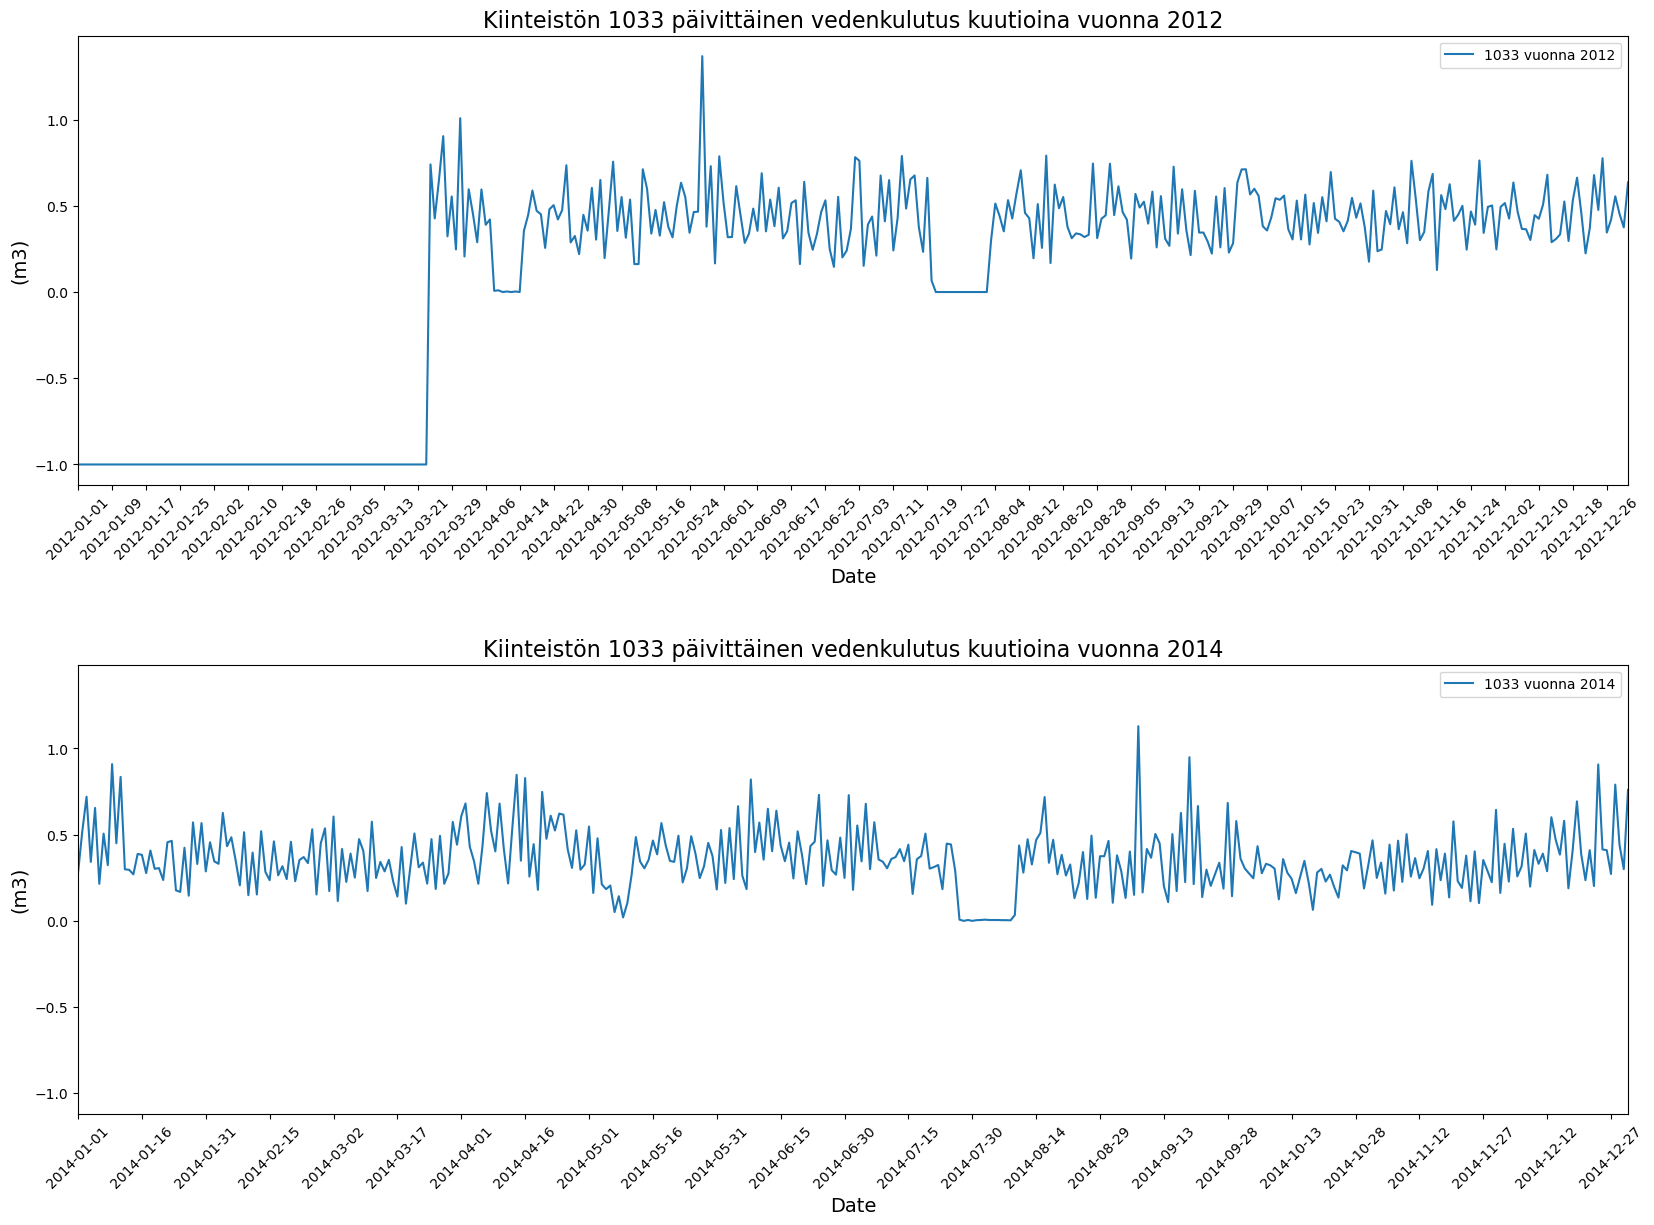

In [277]:
#Kuvaaja 3.1

# Muuta muuttujiin 'vuosi1' ja 'vuosi2' valitsemasi vuodet, sekä muuttujaan 'kiinteisto' valitsemasi kiinteistönumero.

vuosi1 = '2012'
# vuosi2 = '2013'
vuosi2 = '2014'
# kiinteisto = '791'
kiinteisto = '1033'

fig, axs = plt.subplots(2, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))

axs[0].plot(df['date'][(df['Year'] == int(vuosi1))], df[kiinteisto][(df['Year'] == int(vuosi1))])
axs[0].set_title('Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina vuonna ' + vuosi1, size=16)
axs[0].set_ylabel('(m3)', size=14)
axs[0].set_xlabel('Date', size=14)
axs[0].set_xlim(vuosi1 + '-01-01', vuosi1 + '-12-31')
axs[0].xaxis.set_major_locator(plt.MaxNLocator(52))
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend([kiinteisto + ' vuonna ' + vuosi1])

axs[1].plot(df['date'][(df['Year'] == int(vuosi2))], df[kiinteisto][(df['Year'] == int(vuosi2))])
axs[1].set_title('Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina vuonna ' + vuosi2, size=16)
axs[1].set_ylabel('(m3)', size=14)
axs[1].set_xlabel('Date', size=14)
axs[1].set_xlim(vuosi2 + '-01-01', vuosi2 + '-12-31')
axs[1].xaxis.set_major_locator(plt.MaxNLocator(30))
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend([kiinteisto + ' vuonna ' + vuosi2])

plt.show()

#### Kuvaaja 3.2: Vedenkäyttö kuukausittain

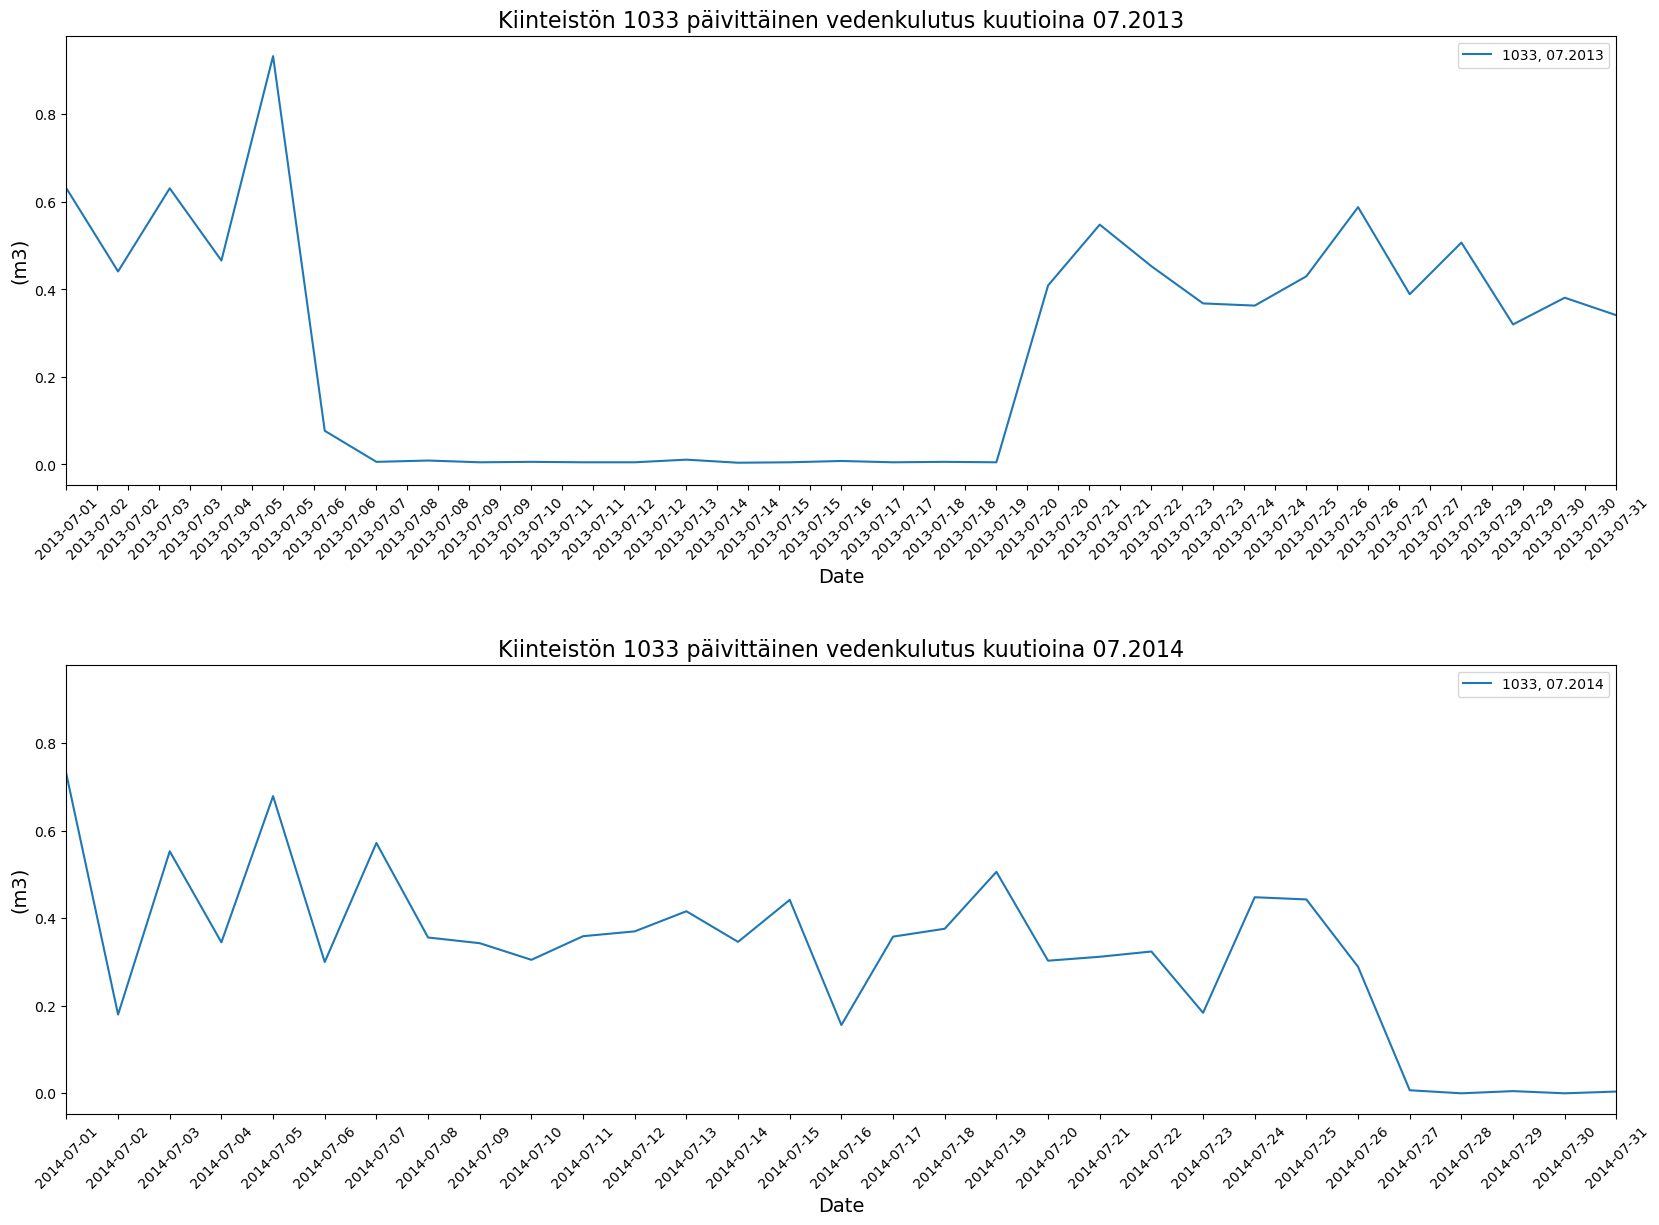

In [279]:
# Kuvaaja 3.2

# Muuta muuttujiin 'vuosi1' ja 'vuosi2' valitsemasi vuodet, 'kuukausi1' ja 'kuukausi2'
# tarkasteltavat kuukaudet, sekä muuttujaan 'kiinteisto' valitsemasi kiinteistönumero.

# Huom! Käytä etunollaa kuukausien 1-9 numeroissa 1-9.

vuosi1 = '2013'
kuukausi1 = '07'
vuosi2 = '2014'
kuukausi2 = '07'
kiinteisto = '1033'

fig, axs = plt.subplots(2, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))

axs[0].plot(df['date'][(df['Year'] == int(vuosi1)) & (df['Month'] == int(kuukausi1))],
            df[kiinteisto][(df['Year'] == int(vuosi1)) & (df['Month'] == int(kuukausi1))])
axs[0].set_title(
    'Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina ' + kuukausi1 + '.' + vuosi1,
    size=16)
axs[0].set_ylabel('(m3)', size=14)
axs[0].set_xlabel('Date', size=14)
axs[0].set_xlim(vuosi1 + '-' + kuukausi1 + '-01', vuosi1 + '-' + kuukausi1 + '-31')
axs[0].xaxis.set_major_locator(plt.MaxNLocator(52))
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend([kiinteisto + ', ' + kuukausi1 + '.' + vuosi1])

axs[1].plot(df['date'][(df['Year'] == int(vuosi2)) & (df['Month'] == int(kuukausi2))],
            df[kiinteisto][(df['Year'] == int(vuosi2)) & (df['Month'] == int(kuukausi2))])
axs[1].set_title(
    'Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina ' + kuukausi2 + '.' + vuosi2, size=16)
axs[1].set_ylabel('(m3)', size=14)
axs[1].set_xlabel('Date', size=14)
axs[1].set_xlim(vuosi2 + '-' + kuukausi2 + '-01', vuosi2 + '-' + kuukausi2 + '-31')
axs[1].xaxis.set_major_locator(plt.MaxNLocator(30))
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend([kiinteisto + ', ' + kuukausi2 + '.' + vuosi2])

plt.show()

#### Kuvaaja 3.3: Saman kiinteistön vedenkäyttö viikoittain

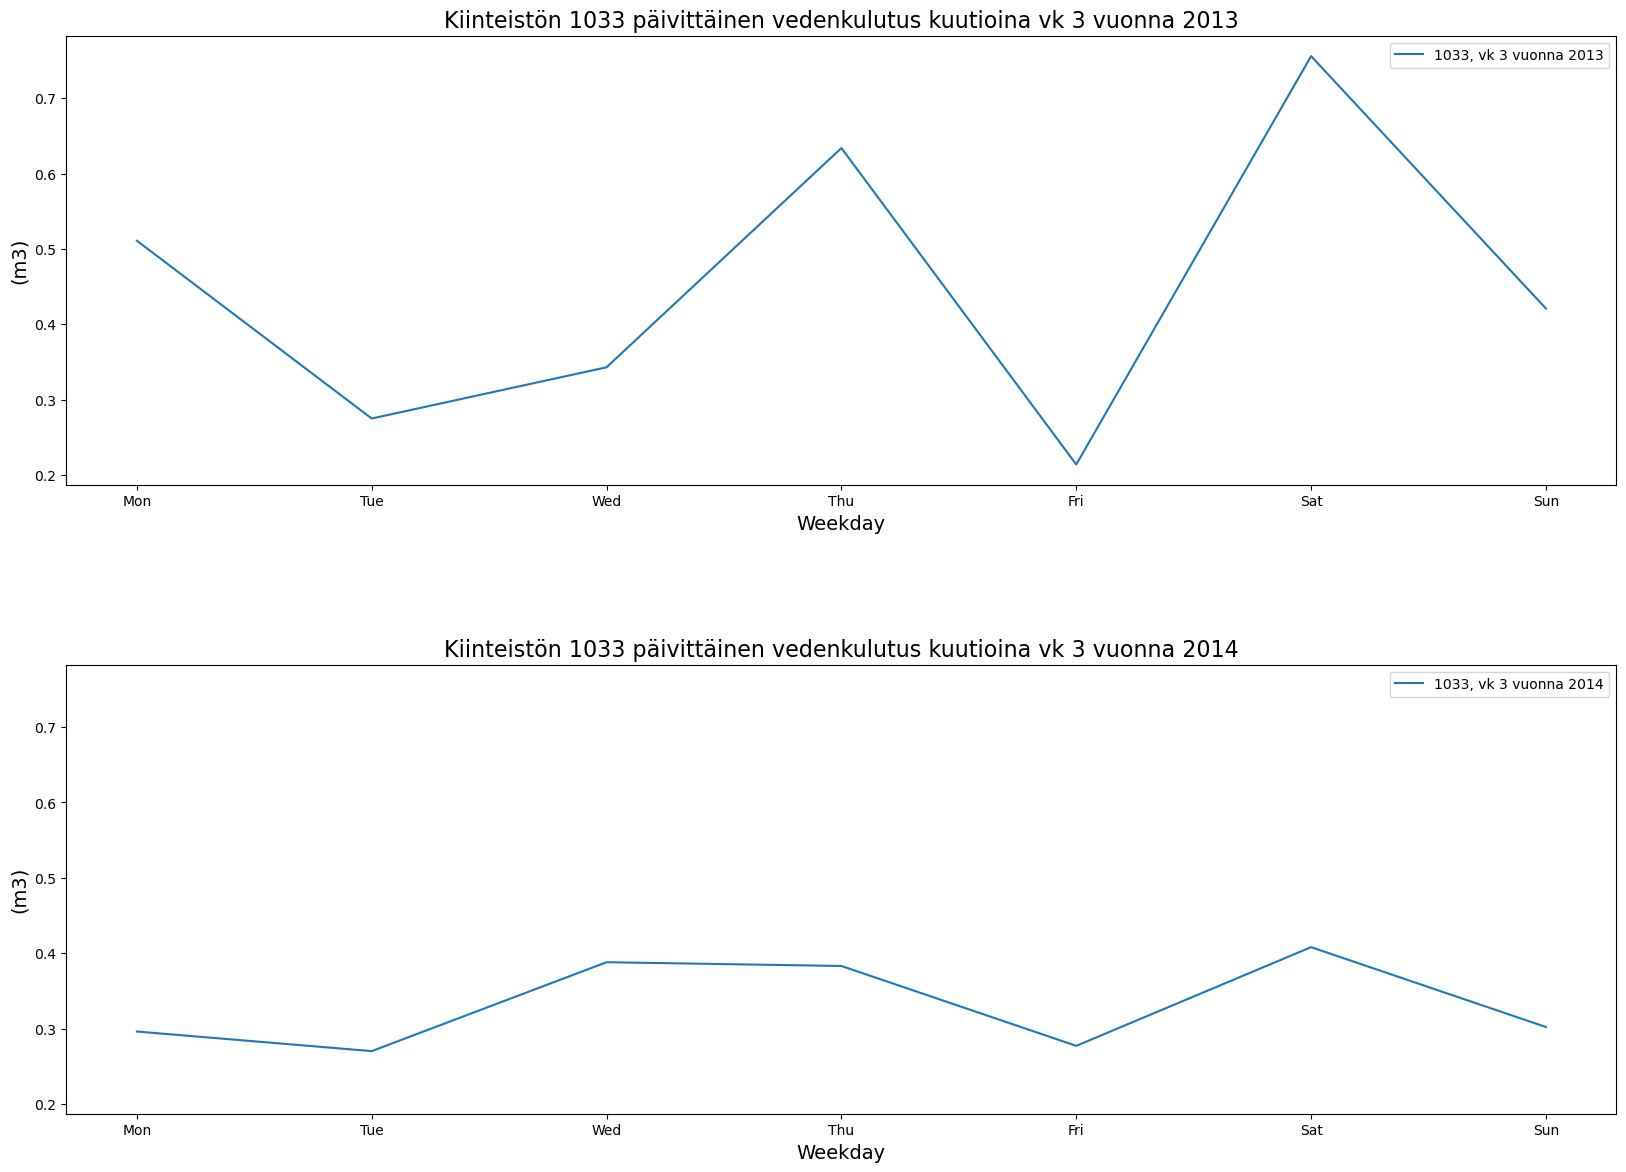

In [280]:
# Kuvaaja 3.3
vuosi1 = '2013'
viikko1 = '3'
vuosi2 = '2014'
viikko2 = '3'
kiinteisto = '1033'

fig, axs = plt.subplots(2, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))

axs[0].plot(df['Weekday'][(df['Year'] == int(vuosi1)) & (df['Week'] == int(viikko1))],
            df[kiinteisto][(df['Year'] == int(vuosi1)) & (df['Week'] == int(viikko1))])
axs[0].set_title(
    'Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina vk ' + viikko1 + ' vuonna ' + vuosi1,     size=16)
axs[0].set_ylabel('(m3)', size=14)
axs[0].set_xlabel('Weekday', size=14)
axs[0].legend([kiinteisto + ', vk ' + viikko1 + ' vuonna ' + vuosi1])

axs[1].plot(df['Weekday'][(df['Year'] == int(vuosi2)) & (df['Week'] == int(viikko2))],
            df[kiinteisto][(df['Year'] == int(vuosi2)) & (df['Week'] == int(viikko2))])
axs[1].set_title(
    'Kiinteistön ' + kiinteisto + ' päivittäinen vedenkulutus kuutioina vk ' + viikko2 + ' vuonna ' + vuosi2, size=16)
axs[1].set_ylabel('(m3)', size=14)
axs[1].set_xlabel('Weekday', size=14)
axs[1].legend([kiinteisto + ', vk ' + viikko2 + ' vuonna ' + vuosi2])

plt.show()

## Tehtävä 4: Eri kiinteistöjen välistä vertailua

Tehtävänäsi on tehdä vertailua eri kiinteistöjen välillä. Pohdi ainakin seuraavia asioita:
* Millaisia kiinteistöjä lähdedatassa voisi olla mukana?
* Voiko kiinteistöjä ryhmitellä?
* Miten kiinteistöjä voi ryhmitellä?

Voit käyttää tehtävän kuvaajia **4.1-4.5.3** apuna havaintojen tekemiseen ja kysymyksiin vastaamiseen.

Kuvaajien selitykset:
* Kuvaajat 4.1.1 ja 4.1.2: Viiksikaaviot kiinteistöjen vedenkäytön summista eri vuosina
* Kuvaaja 4.2: Kiinteistöjen vedenkäytön summa valitulta mittausajalta
* Kuvaaja 4.3: Kaikkien kiinteistöjen vedenkäytön kumulatiivinen summa yhden vuoden ajalta
* Kuvaaja 4.4: Vedenkäytön kumulatiivinen summa koko mittausjaksolla
* Kuvaajat 4.5.1-4.5.3: Vertailua kolmen eri kiinteistön vedenkulutuksesta koko mittausjaksolta, yhden vuoden ajalta ja kuukauden ajalta.
    * Tähän voi vaihtaa vertailtavia kiinteistöjä

**Huomioita**
* Huom. Ennen kuvaajien piirtämistä aja koodi **"Tehtävä 4 koodi 1"**.
* DataFrame-taulukossa `df2` ei ole enää mukana lainkaan **".1"**-loppuisia kiinteistötunnuksia.

### Tehtävä 4 - koodi 1

Lasketaan myös kumulatiiviset summat vedenkulutuksista kiinteistöille eri vuosina.

Huom! Tämä ajettava ennen myöhemmin tehtävää kuvioiden piirtämistä

In [210]:
#Tehtävä 4 koodi 1
df2 = pd.read_csv('Data/Yorkshire_external_meter_readings_combined_2012_2015.csv', index_col=0)
df2.replace(-1, 0, inplace=True)
df2[(df2['Year'] == 2012)].tail()

,date,1,2,3,5,6,7,8,10,11,...,2154,2155,2156,2157,2158,Year,Month,Day,Week,Weekday
361,2012-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184,0.001,0.218,0.431,0.170,2012,12,27,52,Thu
362,2012-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120,0.406,0.388,0.443,0.090,2012,12,28,52,Fri
363,2012-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.301,0.501,0.260,0.444,0.191,2012,12,29,52,Sat
364,2012-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153,0.286,0.254,0.747,0.105,2012,12,30,52,Sun
365,2012-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197,0.168,0.201,0.841,0.110,2012,12,31,1,Mon


In [211]:
#Tehtävä 4 koodi 1 -jatkuu
date_col = df2['date']
deleted_columns = ['date', 'Month', 'Day', 'Week', 'Weekday']

# Kopioidaan alkuperäinen dataframe nimelle df3
df3 = df2.copy()
for column_name in deleted_columns:
    df3.drop(column_name, axis=1, inplace=True)

# Lasketaan kumulatiiviset kulutusarvot kaikille vuosille datasta
vuosi_2012_all = df3[(df3['Year'] == 2012)].cumsum()
vuosi_2013_all = df3[(df3['Year'] == 2013)].cumsum()
vuosi_2014_all = df3[(df3['Year'] == 2014)].cumsum()
vuosi_2015_all = df3[(df3['Year'] == 2015)].cumsum()
vuosi_2012_all['date'] = date_col
vuosi_2013_all['date'] = date_col
vuosi_2014_all['date'] = date_col
vuosi_2015_all['date'] = date_col

df3.drop('Year', axis=1, inplace=True)
vuosi_2012_all.drop('Year', axis=1, inplace=True)
vuosi_2013_all.drop('Year', axis=1, inplace=True)
vuosi_2014_all.drop('Year', axis=1, inplace=True)
vuosi_2015_all.drop('Year', axis=1, inplace=True)
vuosi_2012 = vuosi_2012_all.reset_index(drop=True)
vuosi_2013 = vuosi_2013_all.reset_index(drop=True)
vuosi_2014 = vuosi_2014_all.reset_index(drop=True)
vuosi_2015 = vuosi_2015_all.reset_index(drop=True)

koko_mittausjakso = df3.iloc[-1]
vuosi_2012 = vuosi_2012.iloc[-1]
vuosi_2013 = vuosi_2013.iloc[-1]
vuosi_2014 = vuosi_2014.iloc[-1]
vuosi_2015 = vuosi_2015.iloc[-1]


#### Datan esittäminen

* Dataa voi ryhmitellä numeerisesti eri tavoin

Alla joitakin perustapoja tähän


In [212]:
# kumulatiivisesti summattu data
vuosi_2012_all.tail()

,1,2,3,5,6,7,8,10,11,12,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,date
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.607,117.034,102.417,69.983,69.222,68.111,61.750,106.704,24.044,2012-12-27
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.015,117.222,102.776,70.232,69.342,68.517,62.138,107.147,24.134,2012-12-28
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.245,117.308,103.114,70.928,69.643,69.018,62.398,107.591,24.325,2012-12-29
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.662,117.433,103.697,71.228,69.796,69.304,62.652,108.338,24.430,2012-12-30
365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.172,117.842,104.062,71.471,69.993,69.472,62.853,109.179,24.540,2012-12-31


In [213]:
vuosi_2012.tail()

2155        69.472
2156        62.853
2157       109.179
2158         24.54
date    2012-12-31
Name: 365, dtype: object

In [214]:
# Valitetaan sarakkeiden (loc[:, 'alku':'loppu']) väli ja kaikki rivit
print(vuosi_2015_all.loc[:, '2154':'date'].head())
vuosi_2015_all.loc[:, '2154':'date'].tail()

       2154   2155   2156   2157   2158        date
1096  0.214  0.342  0.172  0.345  0.257  2015-01-01
1097  0.474  0.620  0.321  0.933  0.339  2015-01-02
1098  0.632  0.972  0.555  1.628  0.489  2015-01-03
1099  0.943  1.383  0.750  2.512  0.605  2015-01-04
1100  1.090  2.048  1.009  2.854  0.774  2015-01-05


,2154,2155,2156,2157,2158,date
1456,28.971,25.836,22.372,53.083,18.367,2015-12-27
1457,28.971,25.836,22.372,53.083,18.367,2015-12-28
1458,28.971,25.836,22.372,53.083,18.367,2015-12-29
1459,28.971,25.836,22.372,53.083,18.367,2015-12-30
1460,28.971,25.836,22.372,53.083,18.367,2015-12-31


### Tilastolliset tunnusluvut laskentaa

* Ryhmitellään kiinteistöjen tilastotietoja vuosien perusteella
* lasketaan tyypilliset tilastolliset tunnusluvut kuten
    * lukumäärä,
    * summa,
    * keskiarvo,
    * keskihajonta sekä
    * minimi ja maksimi
* Lisäksi puretaan saatu kaksitasoinen sarakeindeksi yksitasoiseksi indeksiksi.

Mieti millaisia muita tapoja tähän ryhmittelyyn voisit tehdä?
Huom! halutessasi voit kehitellä lisää koodiratkaisuja, joista voi tulkita datan tietoja yksityiskohtaisemmin.

In [215]:
# Tilastolliset tunnusluvut valituille kiinteistöille
kiinteistot = ['1', '873', '55']
df2.groupby("Year")[kiinteistot].agg([np.sum, np.mean, np.std, np.min, np.max])

1                                        873                      \
         sum      mean       std   amin   amax      sum      mean       std   
Year                                                                          
2012   0.000  0.000000  0.000000  0.000  0.000   95.858  0.261907  0.246634   
2013  15.638  0.042844  0.065834  0.000  0.218  126.468  0.346488  0.124927   
2014  48.372  0.132526  0.038599  0.071  0.321  138.400  0.379178  0.137597   
2015   5.932  0.016252  0.046959  0.000  0.235   25.013  0.068529  0.114853   

                         55                                  
       amin   amax      sum      mean       std  amin  amax  
Year                                                         
2012  0.000  2.879    0.000  0.000000  0.000000  0.00  0.00  
2013  0.077  0.933  162.588  0.445447  0.857433  0.00  5.12  
2014  0.078  1.128  253.903  0.695625  0.378296  0.29  5.69  
2015  0.000  0.522   21.749  0.059586  0.171666  0.00  0.73

In [216]:
# Kaikki tilastolliset tunnusluvut valituille kiinteistöille
df2.groupby("Year")[kiinteistot].describe().round(3)

1                                                     873         \
      count   mean    std    min    25%    50%    75%    max  count   mean   
Year                                                                         
2012  366.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  366.0  0.262   
2013  365.0  0.043  0.066  0.000  0.000  0.000  0.108  0.218  365.0  0.346   
2014  365.0  0.133  0.039  0.071  0.104  0.126  0.155  0.321  365.0  0.379   
2015  365.0  0.016  0.047  0.000  0.000  0.000  0.000  0.235  365.0  0.069   

      ...                   55                                                 
      ...    75%    max  count   mean    std   min    25%    50%    75%   max  
Year  ...                                                                      
2012  ...  0.367  2.879  366.0  0.000  0.000  0.00  0.000  0.000  0.000  0.00  
2013  ...  0.415  0.933  365.0  0.445  0.857  0.00  0.000  0.000  0.721  5.12  
2014  ...  0.461  1.128  365.0  0.696  0.378  0.29  0.532  0.645  0.744  5.69  
2015  ...  0.150  0.522  365.0  0.060  0.172  0.00  0.000  0.000  0.000  0.73  

[4 rows x 24 columns]

In [217]:
# Tilastolliset tunnusluvut valituille kiinteistöille yksitasoisella indeksillä
kiinteistot = ['1', '873', '55']
df2.groupby("Year")[kiinteistot].describe().unstack().reset_index()

,level_0,level_1,Year,0
0,1,count,2012,366.00
1,1,count,2013,365.00
2,1,count,2014,365.00
3,1,count,2015,365.00
4,1,mean,2012,0.00
...,...,...,...,...
91,55,75%,2015,0.00
92,55,max,2012,0.00
93,55,max,2013,5.12
94,55,max,2014,5.69


### Kuvaaja 4.1.1: Viiksikaavio kiinteistöjen vedenkäytön summista eri vuosina.

In [218]:
# date-saraketta ei voi käyttää viiksikaavioiden piirrossa joten poistetaan se vuosittaisesta datasta ennen piirtämistä
vuosi_2012.drop('date', inplace=True)
vuosi_2013.drop('date', inplace=True)
vuosi_2014.drop('date', inplace=True)
vuosi_2015.drop('date', inplace=True)

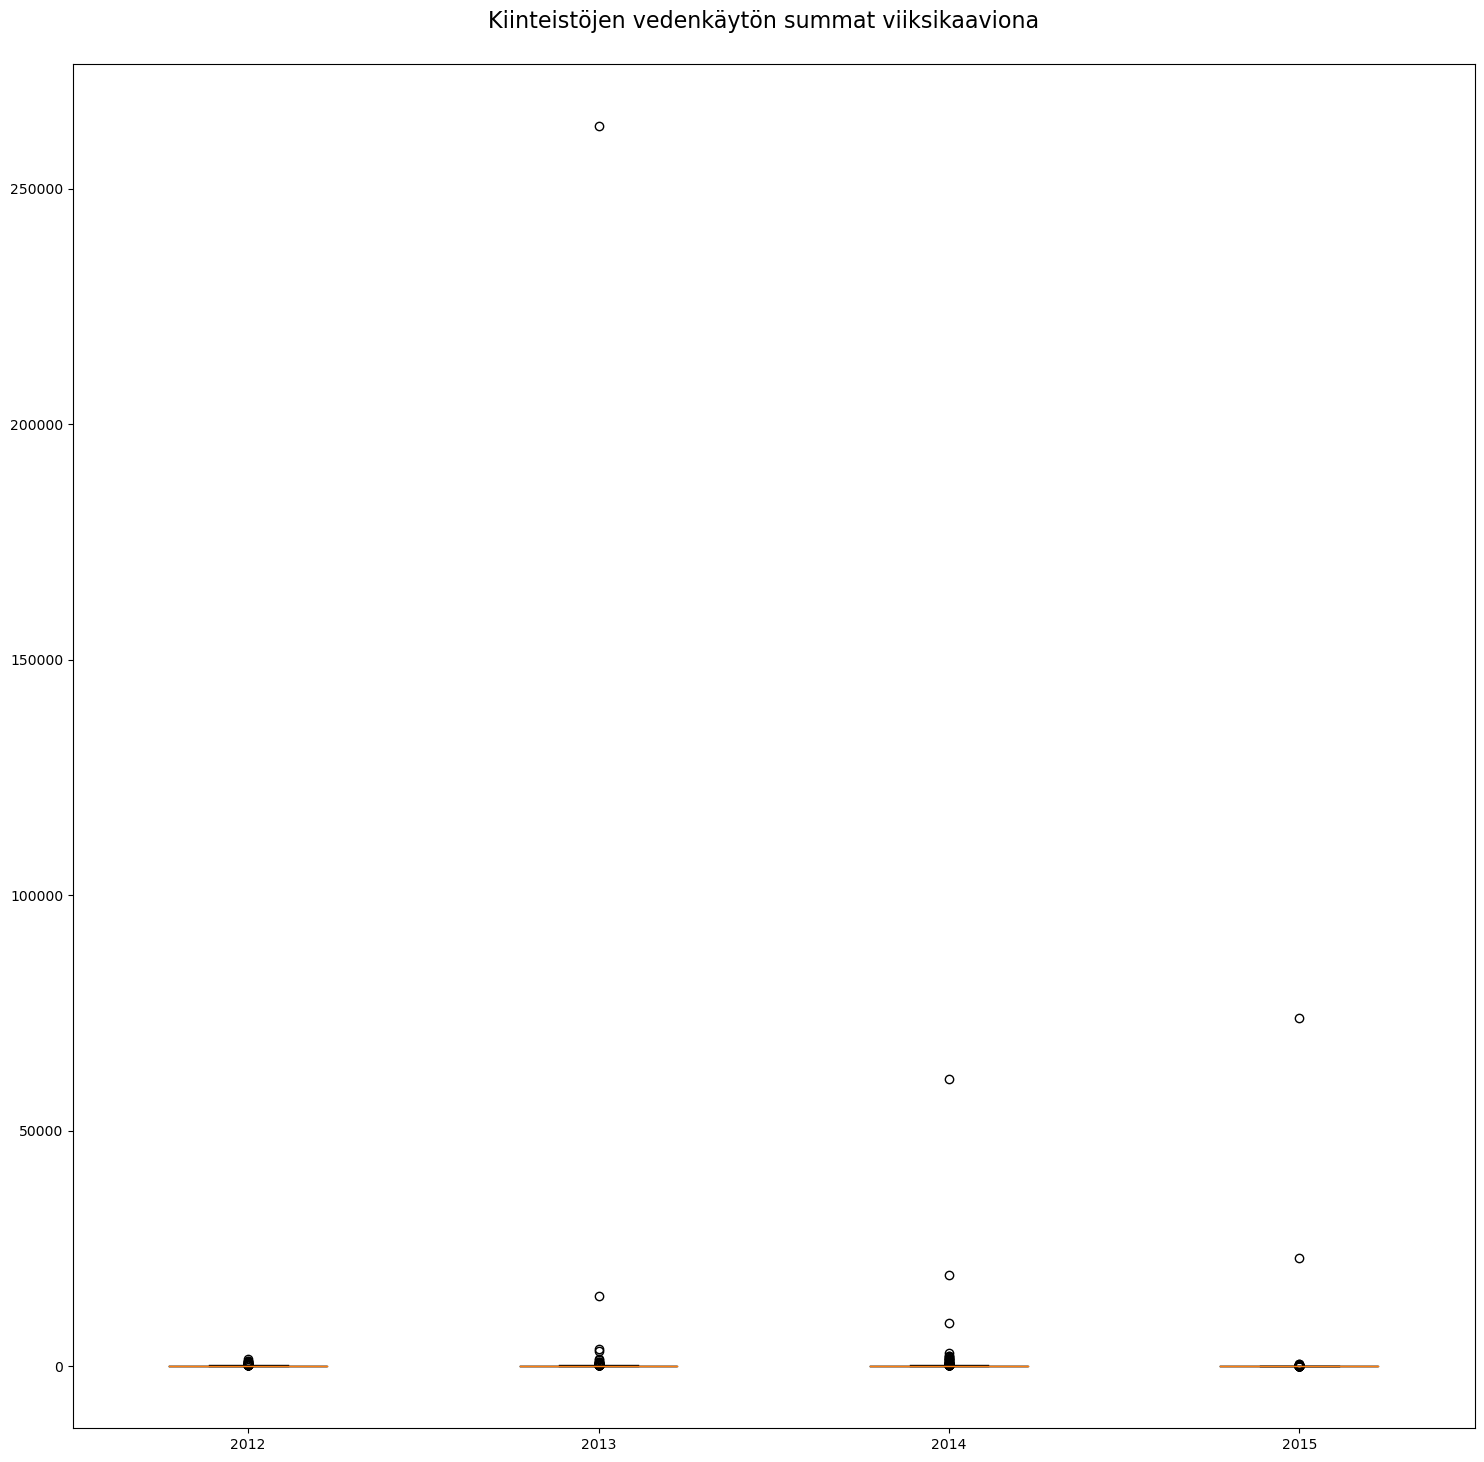

In [219]:
# Kuvaaja 4.1.1: Viiksikaavio kiinteistöjen vedenkäytön summista eri vuosina.

fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle('Kiinteistöjen vedenkäytön summat viiksikaaviona', size=16)
fig.tight_layout(pad=2)
ax.boxplot([vuosi_2012, vuosi_2013, vuosi_2014, vuosi_2015])
plt.xticks([1, 2, 3, 4], ['2012', '2013', '2014', '2015'])
plt.show()


### Kuvaaja 4.1.2: Viiksikaavio kiinteistöjen vedenkäytön summista eri vuosina.

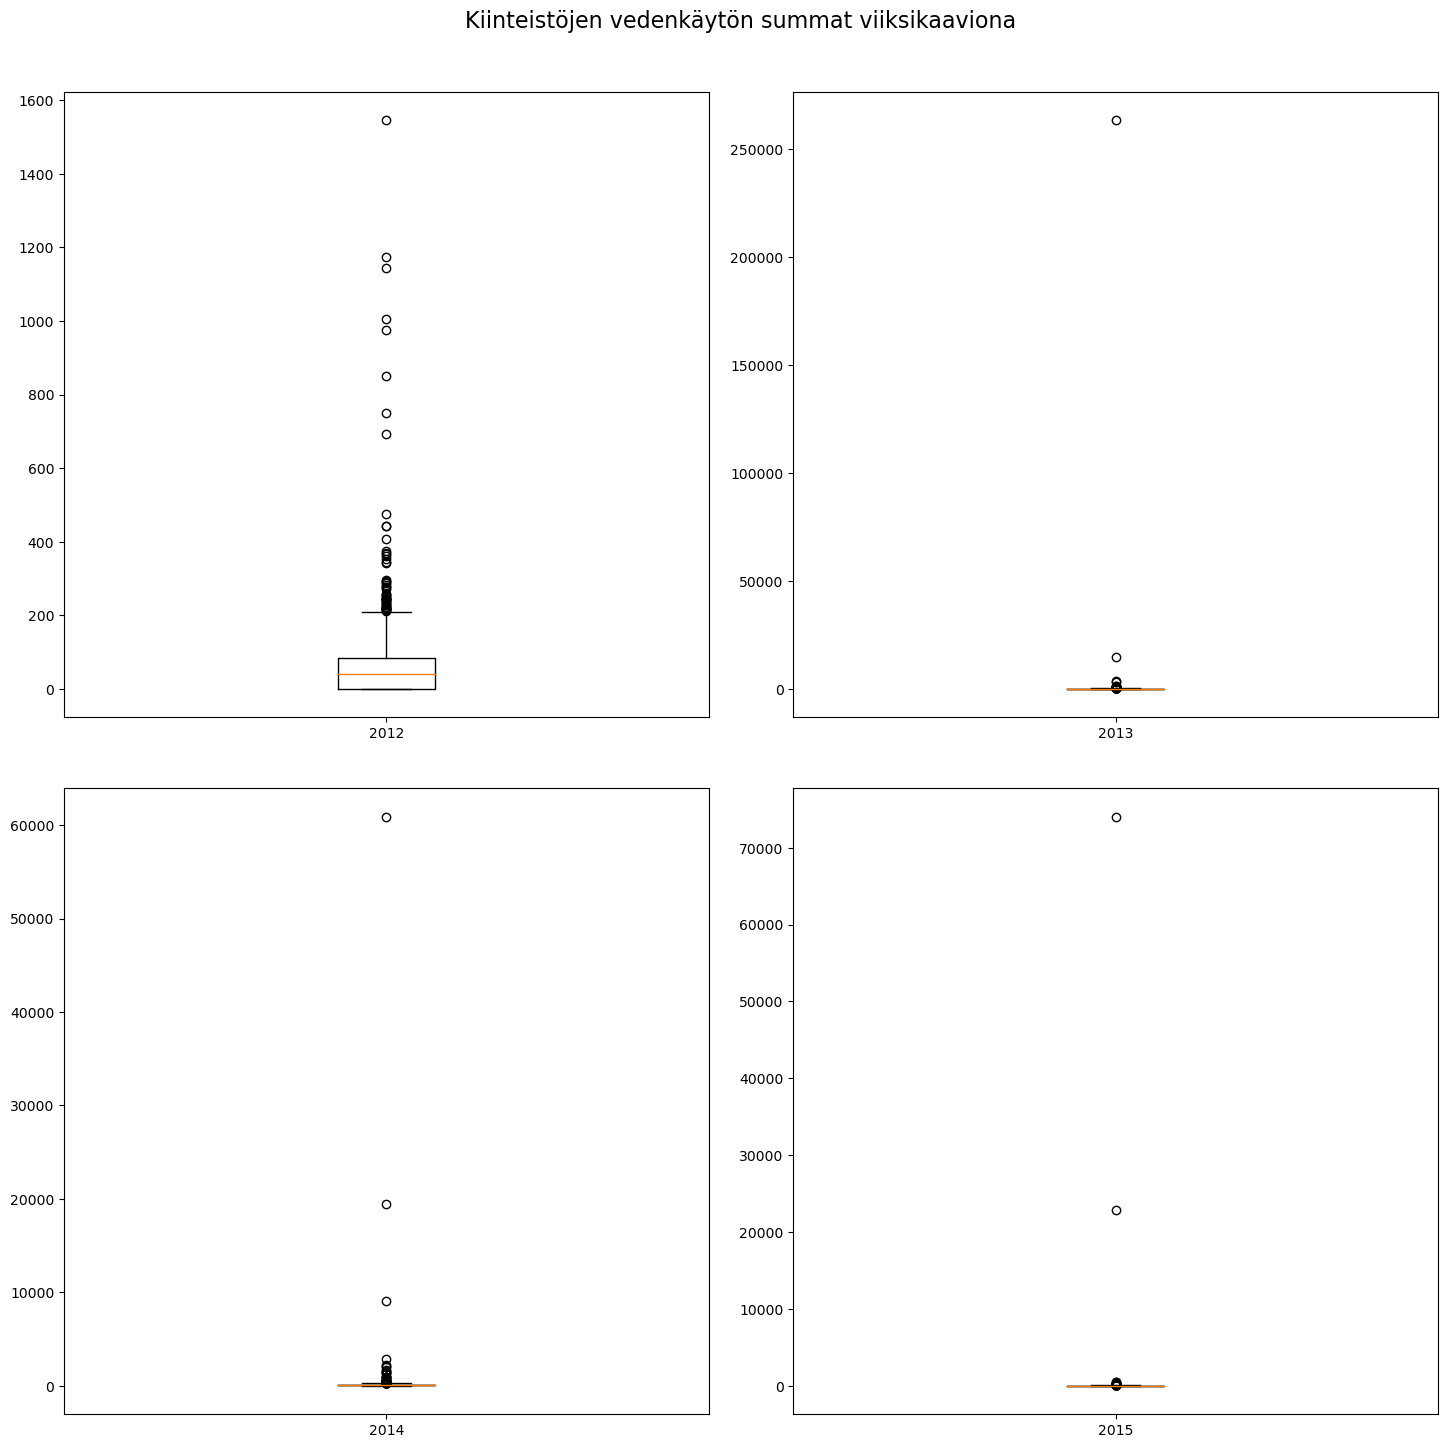

In [220]:
#Kuvaaja 4.1.2: Viiksikaavio kiinteistöjen vedenkäytön summista eri vuosina.

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Kiinteistöjen vedenkäytön summat viiksikaaviona', size=16)
fig.tight_layout(pad=3)

ax[0, 0].boxplot(vuosi_2012)
plt.sca(ax[0, 0])
plt.xticks([1], ['2012'])

ax[0, 1].boxplot(vuosi_2013)
plt.sca(ax[0, 1])
plt.xticks([1], ['2013'])

ax[1, 0].boxplot(vuosi_2014)
plt.sca(ax[1, 0])
plt.xticks([1], ['2014'])

ax[1, 1].boxplot(vuosi_2015)
plt.sca(ax[1, 1])
plt.xticks([1], ['2015'])

plt.show()

### Kuvaaja 4.2: Kiinteistöjen vedenkäytön summa valitulta mittausajalta

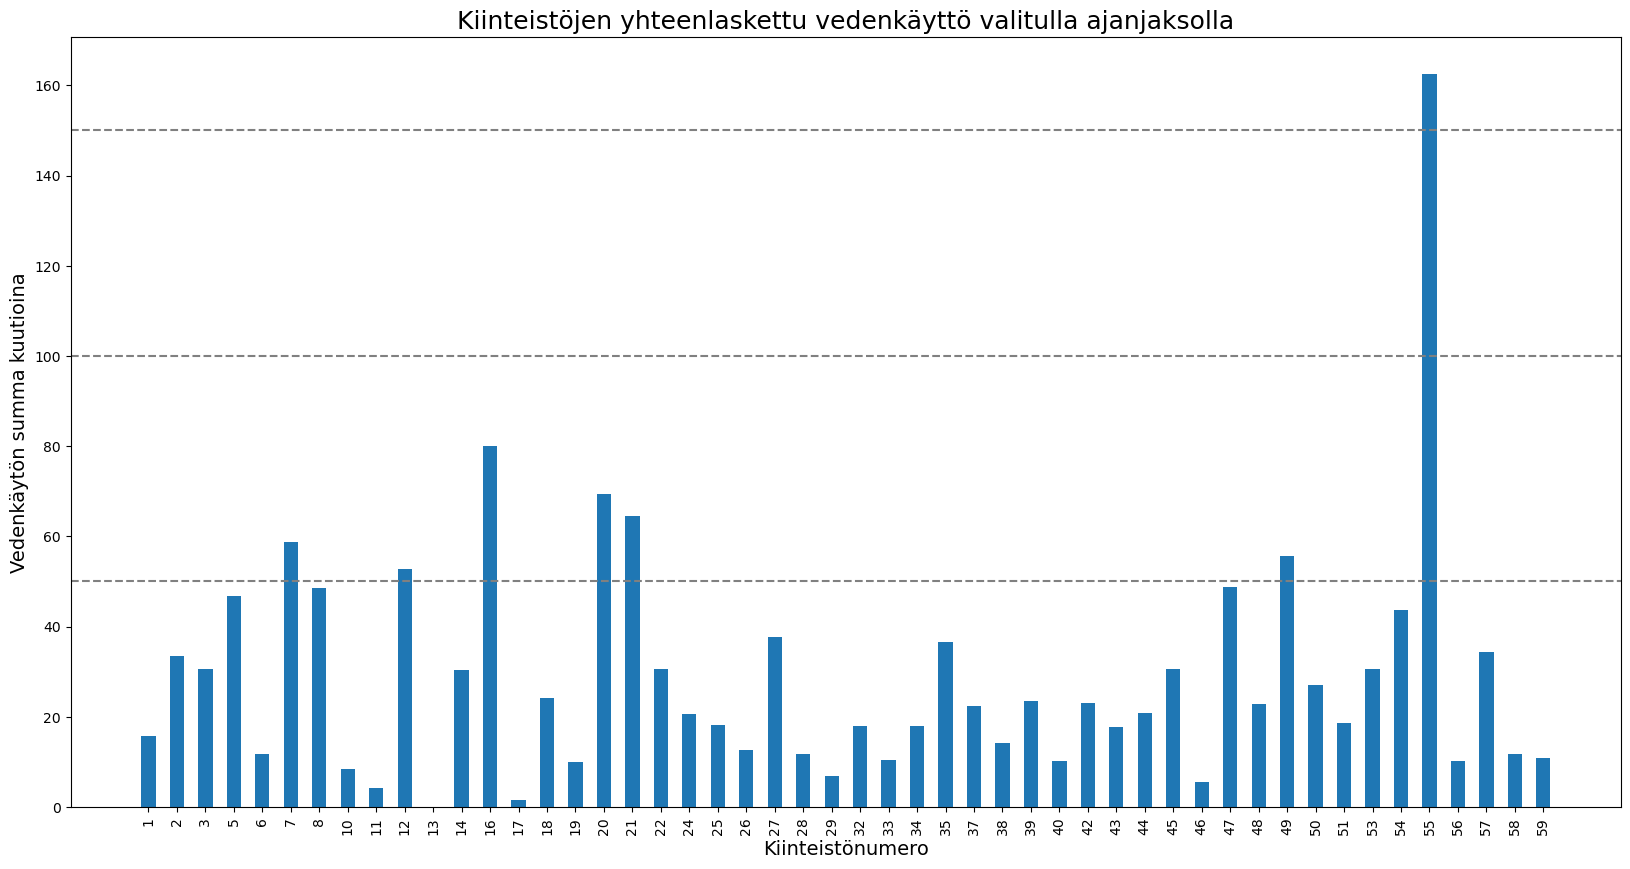

In [221]:
# Kuvaaja 4.2: Kiinteistöjen vedenkäytön summa valitulta mittausajalta

# Kuvaajassa esitetään kunkin kiinteistön yhteenlaskettu vedenkäyttö eri ajanjaksoilla. Valittavina jaksoina ovat
# koko mittausjakso 2012-2015, vuosi 2012, vuosi 2013, vuosi 2014 ja vuosi 2015.

# Kerralla näytettävien kiinteistöjen määrää saat vaihdettua muuttamalla muuttujien "alku" ja "loppu" lukumääriä.
# Esim. arvoilla alku=0 ja loppu=30 näytetään ensimmäiset 30 kiinteistöä, alku=30 ja loppu=50 seuraavat 20 kiinteistöä, jne.
alku = 0
loppu = 50

# Valitse tarkasteltava ajanjakso jättämällä yksi alla olevista korkeuksista kommentoimatta ja merkitse loput kommentoiduiksi.

# heights=koko_mittausjakso[alku:loppu]
#heights=vuosi_2012[alku:loppu]
heights = vuosi_2013[alku:loppu]
# £heights=vuosi_2014[alku:loppu]
# heights=vuosi_2015[alku:loppu]


# Kuvaajassa näkyvien apuviivojen korkeutta saa muutettua muuttujien 'h1', 'h2' ja 'h3' arvoja.
h1 = 50
h2 = 100
h3 = 150

bars = properties[alku:loppu]

fig, axs = plt.subplots(figsize=(20, 10))
#Lisää tänne apuviivat y-akselille 1-3 kpl
axs.bar(bars, heights, width=0.5)
axs.tick_params(axis='x', rotation=90)
axs.set_title('Kiinteistöjen yhteenlaskettu vedenkäyttö valitulla ajanjaksolla', size=18)
axs.set_xlabel('Kiinteistönumero', size=14)
axs.set_ylabel('Vedenkäytön summa kuutioina', size=14)
plt.axhline(y=h1, color='gray', linestyle='--')
plt.axhline(y=h2, color='gray', linestyle='--')
plt.axhline(y=h3, color='gray', linestyle='--')
plt.show()

### Kuvaaja 4.3: Kaikkien kiinteistöjen vedenkäytön kumulatiivinen summa yhden vuoden ajalta

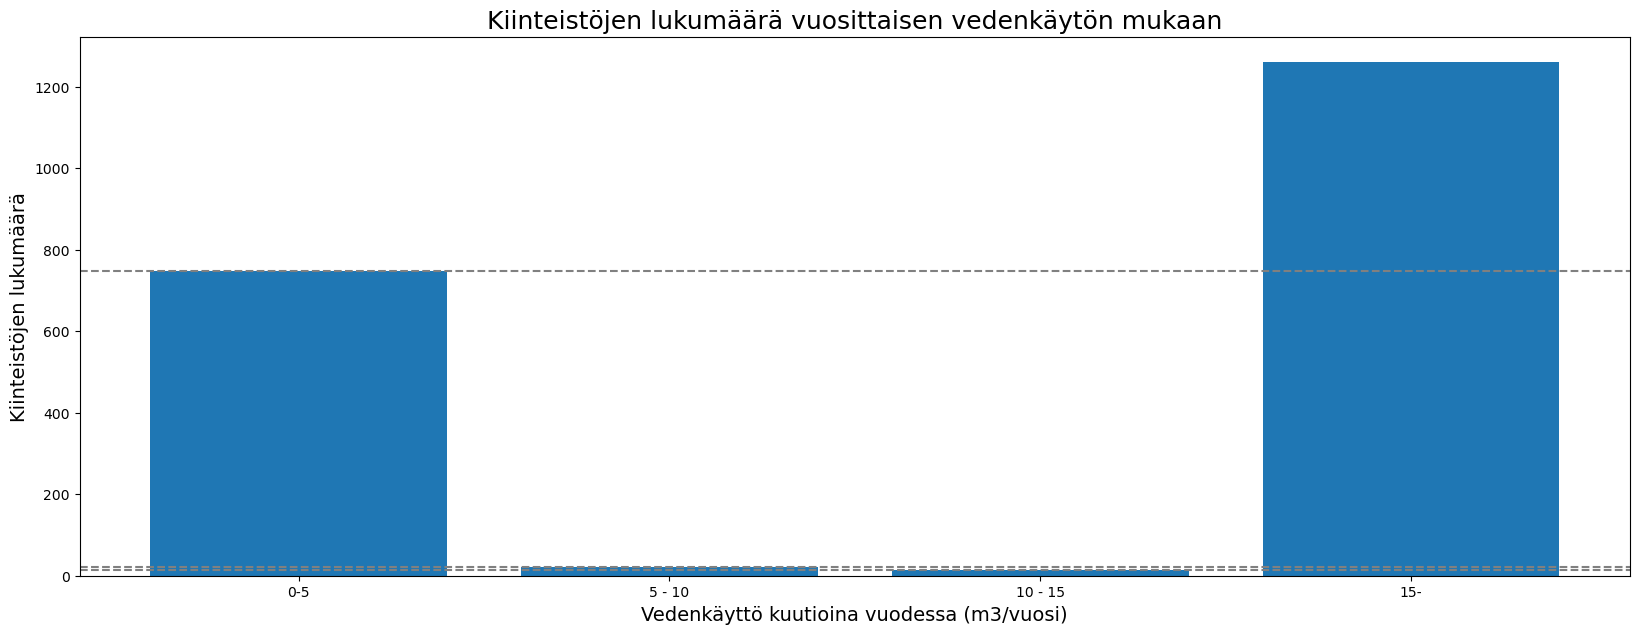

In [222]:
# Kuvaaja 4.3: Kaikkien kiinteistöjen vedenkäytön kumulatiivinen summa yhden vuoden ajalta

# Kuvaajassa esitetään kiinteistöjen lukumäärä vuosittaisen vedenkäytön mukaan. Valittavina ajanjaksoina ovat
# vuosi 2012, vuosi 2013, vuosi 2014 ja vuosi 2015.
# Valitse tarkasteltava ajanjakso jättämällä yksi alla olevista muuttujista (arvot) kommentoimatta ja merkitse loput kommentoiduiksi.

arvot = vuosi_2012
# arvot = vuosi_2013
# arvot = vuosi_2014
# arvot = vuosi_2015

# Voit muuttaa lukumäärien laskemiseen käytettäviä rajoja muuttamalla alla olevia muuttujia 'ylaraja1', 'ylaraja2' ja 'ylaraja3'.

ylaraja1 = 5
ylaraja2 = 10
ylaraja3 = 15

# Apuviivojen korkeutta saa muutettua muuttujien 'h1', 'h2' ja 'h3' arvoja.
h1 = 50
h2 = 100
h3 = 150

bars = ['0-' + str(ylaraja1), str(ylaraja1) + ' - ' + str(ylaraja2), str(ylaraja2) + ' - ' + str(ylaraja3),
        str(ylaraja3) + '-']

h1 = (arvot <= ylaraja1).sum()
h2 = ((arvot > ylaraja1) & (arvot <= ylaraja2)).sum()
h3 = ((arvot > ylaraja2) & (arvot <= ylaraja3)).sum()
h4 = ((arvot > ylaraja3)).sum()

heights = [h1, h2, h3, h4]

fig, axs = plt.subplots(figsize=(20, 7))

axs.bar(bars, heights)
axs.set_title('Kiinteistöjen lukumäärä vuosittaisen vedenkäytön mukaan', size=18)
axs.set_xlabel('Vedenkäyttö kuutioina vuodessa (m3/vuosi)', size=14)
axs.set_ylabel('Kiinteistöjen lukumäärä', size=14)
plt.axhline(y=h1, color='gray', linestyle='--')
plt.axhline(y=h2, color='gray', linestyle='--')
plt.axhline(y=h3, color='gray', linestyle='--')
plt.show()

### Kuvaaja 4.4: Vedenkäytön kumulatiivinen summa koko mittausjaksolla

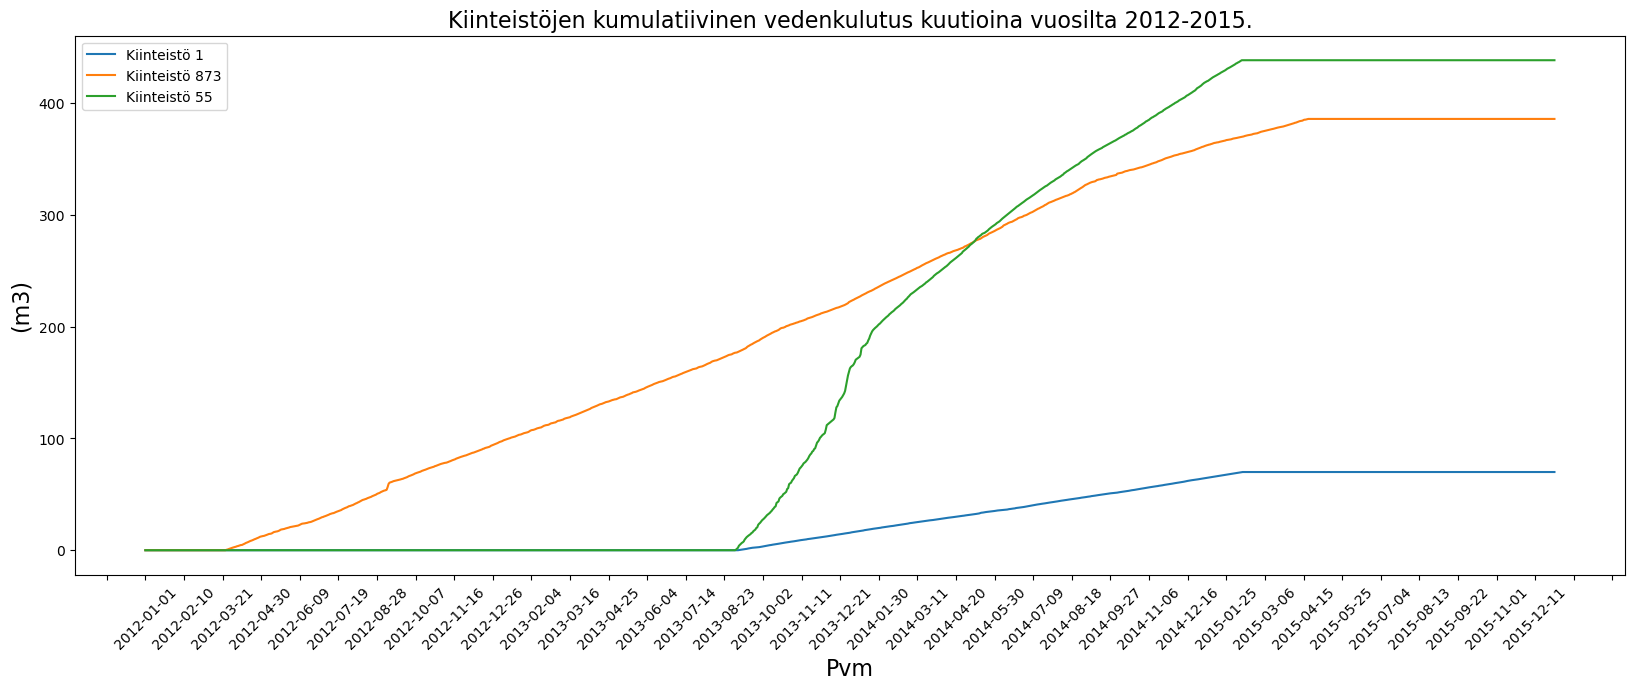

In [223]:
# Kuvaaja 4.4: Vedenkäytön kumulatiivinen summa koko mittausjaksolla

df2 = pd.read_csv('Data/Yorkshire_external_meter_readings_combined_2012_2015.csv', index_col=0)
deleted_columns = ['Month', 'date', 'Day', 'Week', 'Weekday']

date_col = df2['date']
df2.replace(-1, 0, inplace=True)

for column_name in deleted_columns:
    df2.drop(column_name, axis=1, inplace=True)
df = df2.cumsum()
df['date'] = date_col

# Voit muuttaa tarkasteltavia kiinteistöjä muuttamalla kiinteistönumeron muuttujiin 'kiinteisto1', 'kiinteisto2' ja 'kiinteisto3'.

# kiinteisto1 = '1'
# kiinteisto2 = '10'
# kiinteisto3 = '874'
kiinteisto1 = '1'
kiinteisto2 = '873'
kiinteisto3 = '55'

fig, axs = plt.subplots(figsize=(20, 7))

axs.plot(df['date'], df[kiinteisto1])
axs.plot(df['date'], df[kiinteisto2])
axs.plot(df['date'], df[kiinteisto3])

axs.set_title('Kiinteistöjen kumulatiivinen vedenkulutus kuutioina vuosilta 2012-2015.', size=16)
axs.set_ylabel('(m3)', size=16)
axs.set_xlabel('Pvm', size=16)
axs.xaxis.set_major_locator(plt.MaxNLocator(52))
axs.tick_params(axis='x', rotation=45)
axs.legend(['Kiinteistö ' + kiinteisto1, 'Kiinteistö ' + kiinteisto2, 'Kiinteistö ' + kiinteisto3])

plt.show()

#### Kuvaaja 4.5.1: Kiinteistöjen vedenkäytön vertailu koko mittausajalla.

* Tässä tarkastellaan päivittäistä kulutusdataa


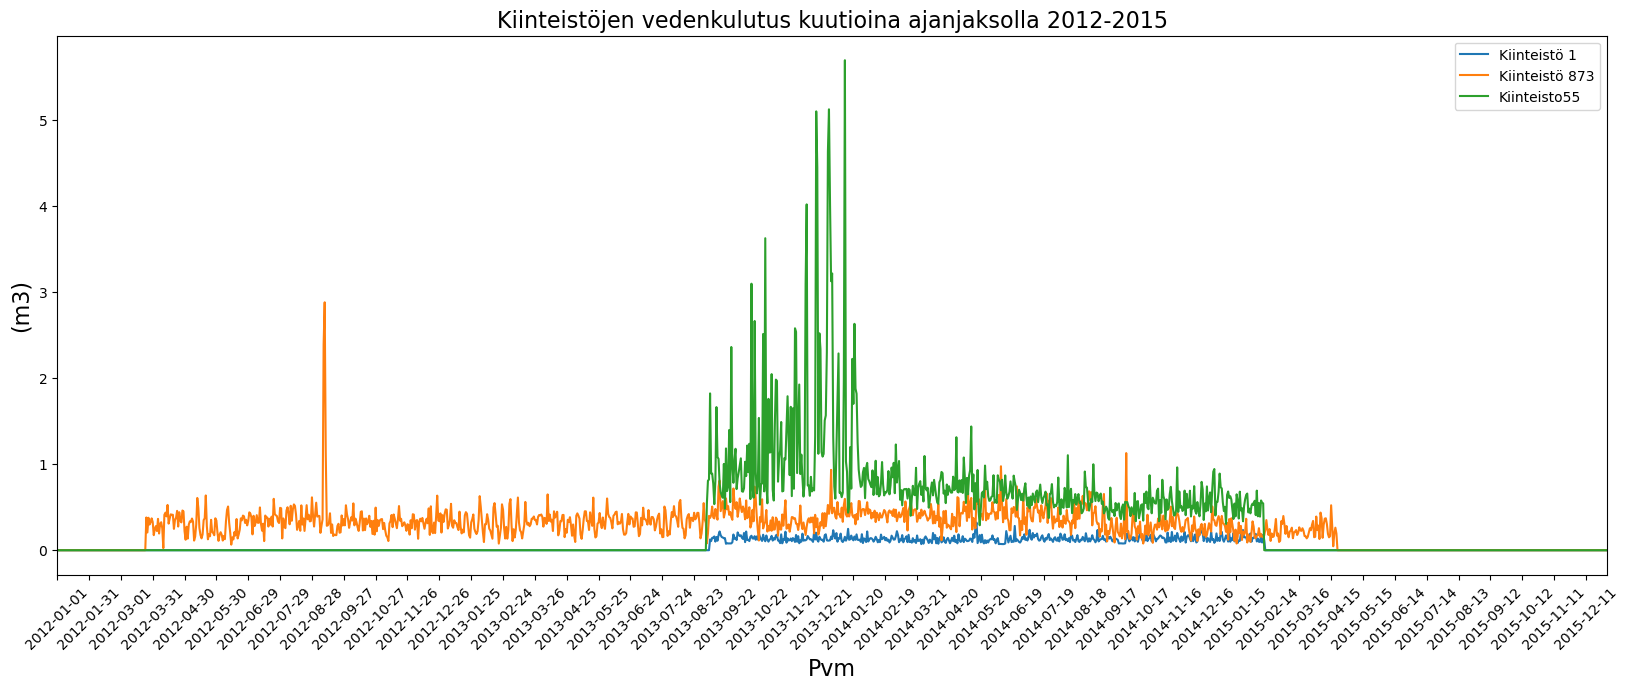

In [224]:
df = pd.read_csv('Data/Yorkshire_external_meter_readings_combined_2012_2015.csv', index_col=0)
df.replace(-1, 0, inplace=True)

# Voit muuttaa tarkasteltavia kiinteistöjä muuttamalla kiinteistönumeron muuttujiin 'kiinteisto1', 'kiinteisto2' ja 'kiinteisto3'.

kiinteisto1 = '1'
kiinteisto2 = '873'
kiinteisto3 = '55'

fig, axs = plt.subplots(figsize=(20, 7))

axs.plot(df['date'], df[kiinteisto1])
axs.plot(df['date'], df[kiinteisto2])
axs.plot(df['date'], df[kiinteisto3])

axs.set_title('Kiinteistöjen vedenkulutus kuutioina ajanjaksolla 2012-2015', size=16)
axs.set_ylabel('(m3)', size=16)
axs.set_xlabel('Pvm', size=16)
axs.set_xlim('2012-01-01', '2015-12-31')
axs.xaxis.set_major_locator(plt.MaxNLocator(52))
axs.tick_params(axis='x', rotation=45)
axs.legend(['Kiinteistö ' + kiinteisto1, 'Kiinteistö ' + kiinteisto2, 'Kiinteisto' + kiinteisto3])

plt.show()

### Kuvaaja 4.5.2: Kiinteistöjen vedenkäytön vertailu vuosittain

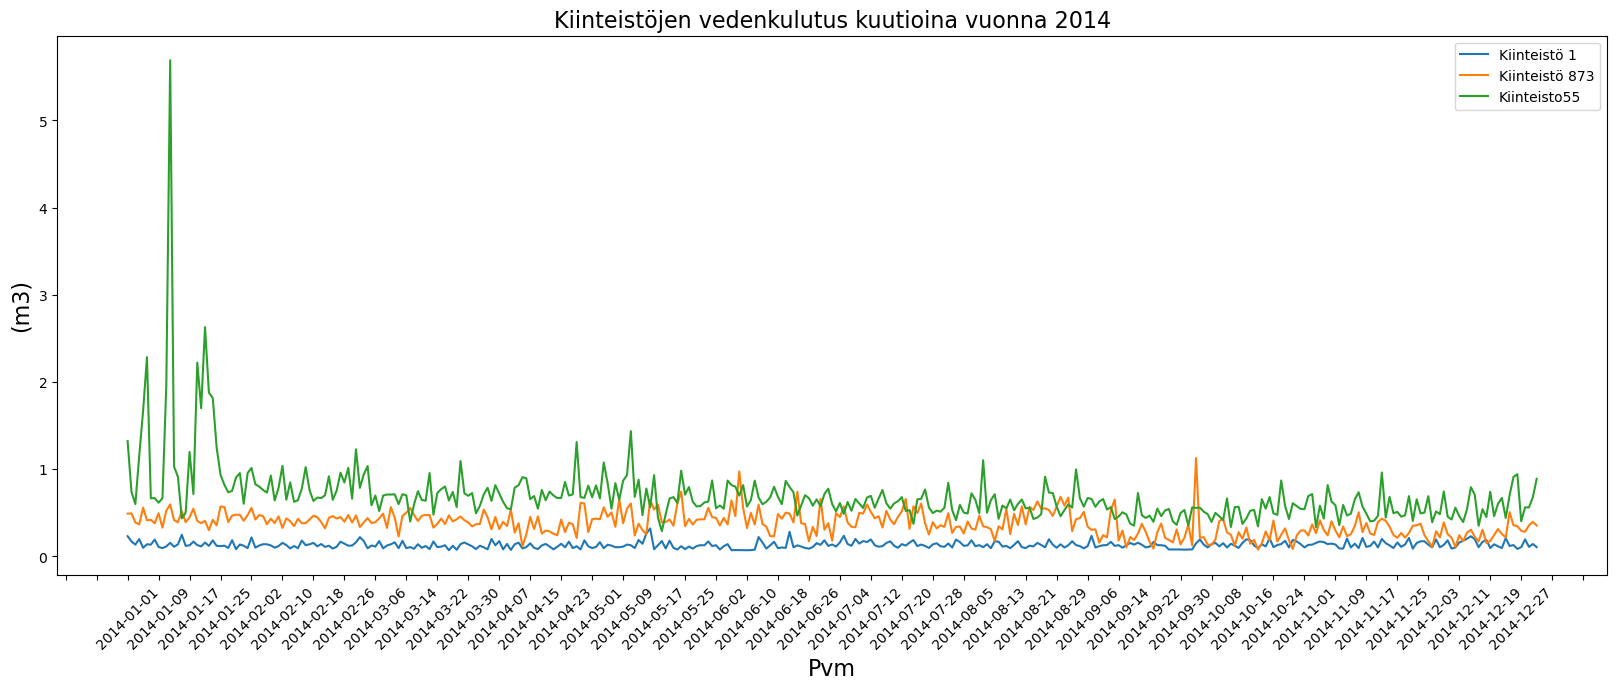

In [226]:
#Kuvaaja 4.5.2: Kiinteistöjen vedenkäytön vertailu vuosittain


# Voit muuttaa tarkasteltavaa vuotta ja kiinteistöjä muuttamalla vuoden muuttujaan 'vuosi',
# ja kiinteistönumeron muuttujiin 'kiinteisto1', 'kiinteisto2' ja 'kiinteisto3'.

vuosi = '2014'
kiinteisto1 = '1'
kiinteisto2 = '873'
kiinteisto3 = '55'

fig, axs = plt.subplots(figsize=(20, 7))

axs.plot(df['date'][(df['Year'] == int(vuosi))], df[kiinteisto1][(df['Year'] == int(vuosi))])
axs.plot(df['date'][(df['Year'] == int(vuosi))], df[kiinteisto2][(df['Year'] == int(vuosi))])
axs.plot(df['date'][(df['Year'] == int(vuosi))], df[kiinteisto3][(df['Year'] == int(vuosi))])

axs.set_title('Kiinteistöjen vedenkulutus kuutioina vuonna ' + vuosi, size=16)
axs.set_ylabel('(m3)', size=16)
axs.set_xlabel('Pvm', size=16)
axs.xaxis.set_major_locator(plt.MaxNLocator(52))
axs.tick_params(axis='x', rotation=45)
axs.legend(['Kiinteistö ' + kiinteisto1, 'Kiinteistö ' + kiinteisto2, 'Kiinteisto' + kiinteisto3])

plt.show()

### Kuvaaja 4.5.3: Kiinteistöjen vedenkäytön vertailu kuukausittain

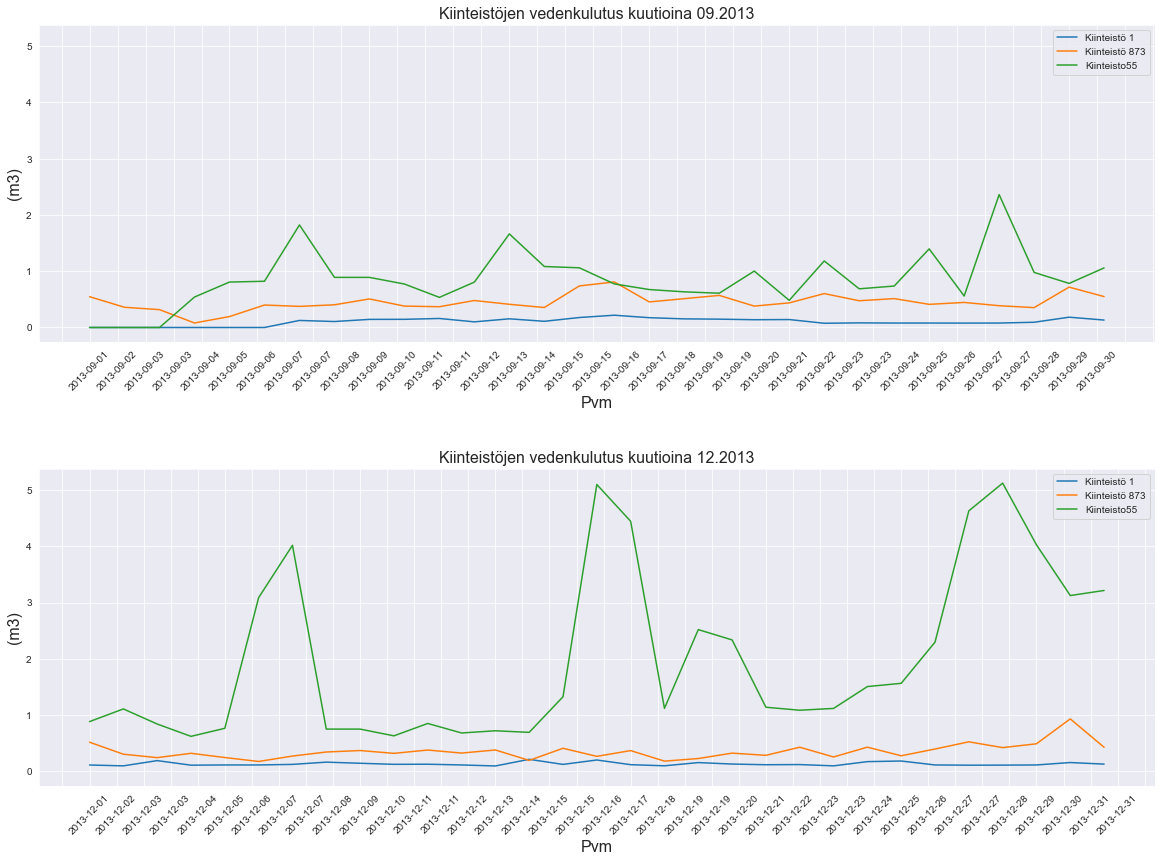

In [27]:
#Kuvaaja 4.5.3: Kiinteistöjen vedenkäytön vertailu kuukausittain
df = pd.read_csv('Data/Yorkshire_external_meter_readings_combined_2012_2015.csv', index_col=0)
df.replace(-1, 0, inplace=True)
# Voit muuttaa tarkasteltavaa vuotta, kuukautta ja kiinteistöjä muuttamalla vuoden muuttujaan 'vuosi', kuukauden muuttujaan 'kuukausi',
# ja kiinteistönumeron muuttujiin 'kiinteisto1', 'kiinteisto2' ja 'kiinteisto3'.
# Huom! Käytä etunollaa kuukausien 1-9 kanssa.

vuosi = '2013'
kuukausi1 = '09'
kuukausi2 = '12'

kiinteisto1 = '1'
kiinteisto2 = '873'
kiinteisto3 = '55'
# kiinteisto1 = '871'
# kiinteisto2 = '873'
# kiinteisto3 = '874'

fig, axs = plt.subplots(2, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))

# Ensimmäinen kuvioon tuleva alikuvaaja (subplot)
axs[0].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))],
         df[kiinteisto1][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))])
axs[0].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))],
         df[kiinteisto2][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))])
axs[0].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))],
         df[kiinteisto3][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi1))])

axs[0].set_title('Kiinteistöjen vedenkulutus kuutioina ' + kuukausi1 + '.' + vuosi, size=16)
axs[0].set_ylabel('(m3)', size=16)
axs[0].set_xlabel('Pvm', size=16)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(52))
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['Kiinteistö ' + kiinteisto1, 'Kiinteistö ' + kiinteisto2, 'Kiinteisto' + kiinteisto3])

# Toinen kuvioon tuleva alikuvaaja
axs[1].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))],
         df[kiinteisto1][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))])
axs[1].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))],
         df[kiinteisto2][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))])
axs[1].plot(df['date'][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))],
         df[kiinteisto3][(df['Year'] == int(vuosi)) & (df['Month'] == int(kuukausi2))])

axs[1].set_title('Kiinteistöjen vedenkulutus kuutioina ' + kuukausi2 + '.' + vuosi, size=16)
axs[1].set_ylabel('(m3)', size=16)
axs[1].set_xlabel('Pvm', size=16)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(52))
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['Kiinteistö ' + kiinteisto1, 'Kiinteistö ' + kiinteisto2, 'Kiinteisto' + kiinteisto3])

plt.show()

### 4.6.1: Veden kulutus scatter plot -kuviona
* Scatter plot kuviolla voidaan piirtää piste (x, y)-koordinaatistoon
* Tässä piirretään vertailukuvio kahden eri kiinteistön välille
* ks. myös seuraava pair plot

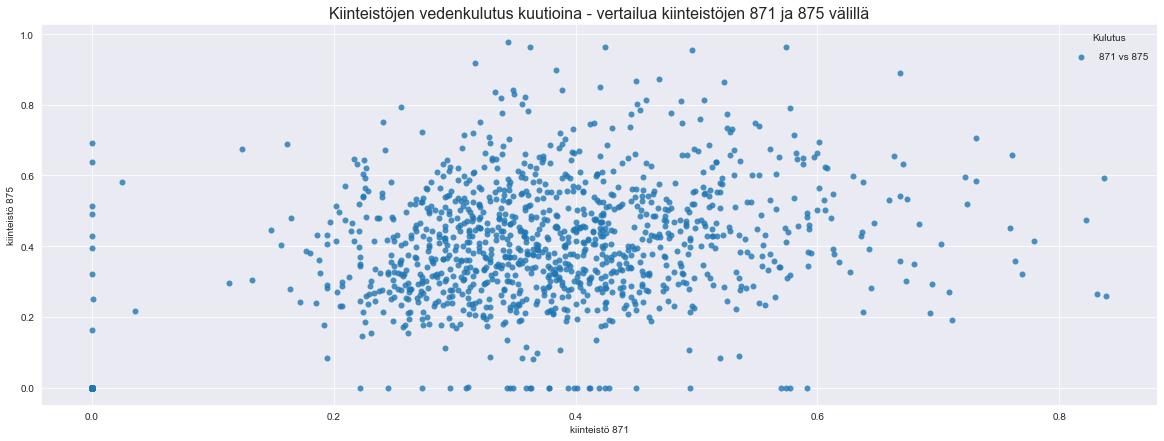

In [28]:
# Scatter plot
# x_arvot = '55'  # Tämän kiinteistön kulutus on kuvion x-akselin arvona
x_akseli = '871'  # Tämän kiinteistön kulutus on kuvion x-akselin arvona
y_akseli = '875'  # Tämän kiinteistön kulutus on kuvion y-akselin arvona

df.loc[:, x_akseli:y_akseli]
fig, axs = plt.subplots(figsize=(20, 7))
axs.scatter(df.loc[:, x_akseli], df.loc[:, y_akseli], label=None,
            cmap='viridis', linewidth=0, alpha=0.8)
axs.set_title('Kiinteistöjen vedenkulutus kuutioina - vertailua kiinteistöjen ' + x_akseli + ' ja ' + y_akseli + " välillä", size=16)
axs.set_xlabel("kiinteistö " + x_akseli)
axs.set_ylabel("kiinteistö " + y_akseli)
axs.legend([str(x_akseli) + " vs " + str(y_akseli)], scatterpoints=1, frameon=False, labelspacing=1, title='Kulutus')
plt.show()

### 4.6.2 pair plot -kuvio

`pairplot()`-funktiolla voi piirtää useita parittaisia muuttujajakaumia.
Se näyttää `(n, 2)`-suhteen muuttujan yhdistelmälle DataFramessa matriisikuviona.
Kuvion diagonaalilla näkyvät kaaviot ovat yksimuuttujaisia kuvioita.

**Huom!** **pair plot -parikuvaaja** piirtää useita **scatter plot**-kuvaajia yhdelle kuvaajalle ja antaa myös jakauman diagonaalisesti.

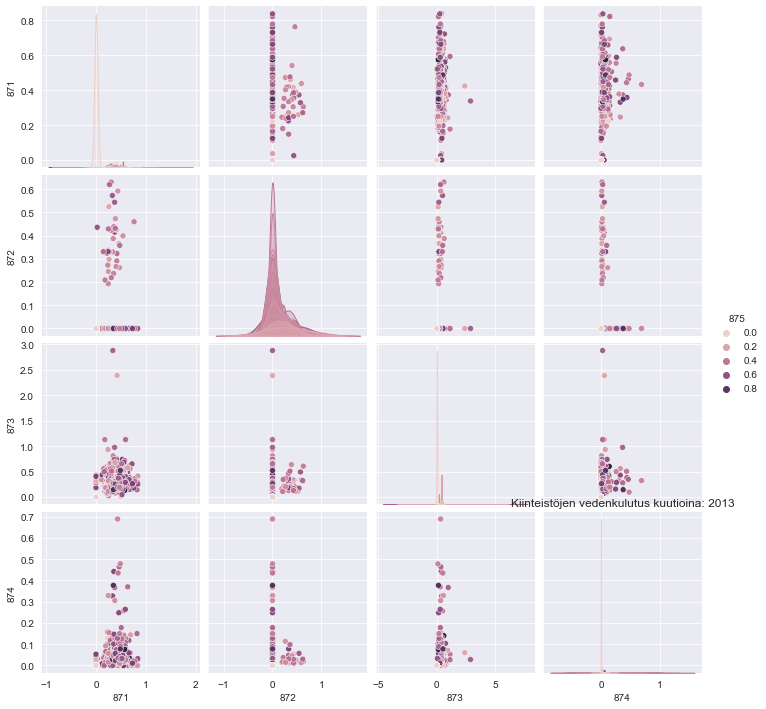

In [29]:
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(df.loc[:, '871':'875'], hue = '875')
plt.title('Kiinteistöjen vedenkulutus kuutioina: ' + vuosi);
plt.show()

### 4.6.3: Histplot-kaavio

* binomijakauma datasta

Huom! Jos poistaa nolla-arvot niin helpompi tehdä tulkintoja

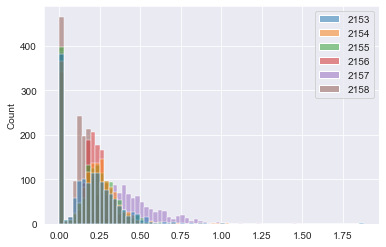

In [30]:
seaborn.histplot(df.loc[:, '2153':'2158'], kde = False)
plt.show()

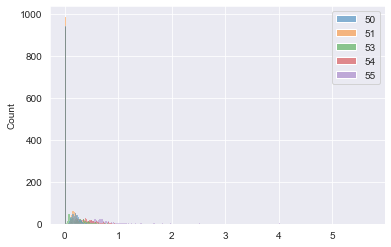

In [31]:
seaborn.histplot(df.loc[:, '50':'55'])
plt.show()

#### Nolla-arvojen poistaminen

Poistetaan nollat ennen kuvion piirtämistä.

In [32]:
df_new = df.loc[:, '50':'55'].copy()

# Poistetaan nolla-arvot sarakkeista

df_new = df_new.loc[(df[['50','51','53','54','55']] != 0).all(axis=1)]
df_new

,50,51,53,54,55
615,0.284,0.137,0.390,0.505,1.821
616,0.131,0.187,0.554,0.420,0.890
617,0.204,0.138,0.050,0.625,0.890
618,0.144,0.147,0.118,0.474,0.772
619,0.219,0.270,0.129,0.266,0.535
...,...,...,...,...,...
1132,0.143,0.206,0.332,0.585,0.548
1133,0.083,0.189,0.491,0.380,0.390
1134,0.310,0.220,0.595,0.520,0.578
1135,0.210,0.154,0.071,0.316,0.551


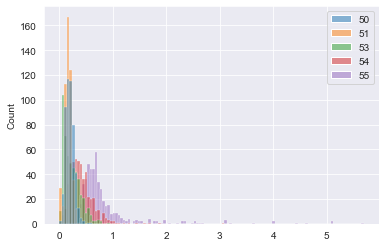

In [33]:
# Poistettu nolla-arvot - kuvio selkenee
seaborn.histplot(df_new)
plt.show()

### 5.x, TODO: Omat kuviot ja datan esikäsittely

* Voit tehdä omia kokeiluja Datan ymmärtämisen helpottamiseksi.
* Tai voit tehdä kokeiluja datan esikäsittelyyn
* Voit myös hakea erilaisia kuviotyyppejä helpottamaan hahmottamista
* Tai sitten voit vaan muuttaa valmiita Jupyter Notebook -esimerkkejä hieman tehden niihin pieniä muutoksia

In [34]:
# TODO: Omia testejä....

In [100]:
habit_data = pd.read_csv("Data/Yorkshire_Water_consumer_habits.csv")
habit_data.head()

,Month,Year,Date,Postal outcode,Functional area,County,Latitude,Longitude,Number-Of-Showers,Number-Of-Toilets,...,Person-Water-Use-Litres-Yearly,Person-Water-Use-Money-£-Yearly,Person-Water-Use-Litres-Per-Day,Person-Water-Saving-Litres-Yearly,Person-Water-Saving-Money-£-Yearly,Person-Water-Saving-Litres-Per-Day,Household-Energy-Rate-KWh,Household-Water-Rate-Cubic-Metre,Unnamed: 97,Unnamed: 98
0,August,2019,Aug-19,WF10 4,Castleford,West Yorkshire,53.722988,-1.343155,1,2,...,101668,307.04,279,57611,173.99,158,0.0374,3.02,NaN,NaN
1,August,2019,Aug-19,LS7 2,Leeds,West Yorkshire,53.806706,-1.541219,2,3,...,98666,297.97,270,61799,186.63,169,0.0374,3.02,NaN,NaN
2,August,2019,Aug-19,S35 0,Sheffield,South Yorkshire,53.387861,-1.462015,2,3,...,44693,134.97,122,13104,39.57,36,0.0374,3.02,NaN,NaN
3,August,2019,Aug-19,HD3 3,Huddersfield,West Yorkshire,53.636514,-1.789737,1,1,...,113484,342.72,311,71194,215.01,195,0.0374,3.02,NaN,NaN
4,August,2019,Aug-19,LS22 7,Wetherby,West Yorkshire,53.918882,-1.379038,1,2,...,84443,255.02,231,44416,134.14,122,0.0374,3.02,NaN,NaN


In [101]:
mean_data = habit_data.groupby("Home-Type")[["Household-Water-Use-Litres-Yearly", "Person-Water-Use-Litres-Yearly"]].mean().round()
mean_data2 = mean_data.sort_values("Household-Water-Use-Litres-Yearly")
mean_data2

,Household-Water-Use-Litres-Yearly,Person-Water-Use-Litres-Yearly
Home-Type,,
flat,103207.0,61895.0
cottage-bungalow,111217.0,56147.0
terrace,145240.0,61165.0
semi-detached,158016.0,60529.0
detached,171435.0,59166.0


<AxesSubplot:xlabel='Home-Type'>

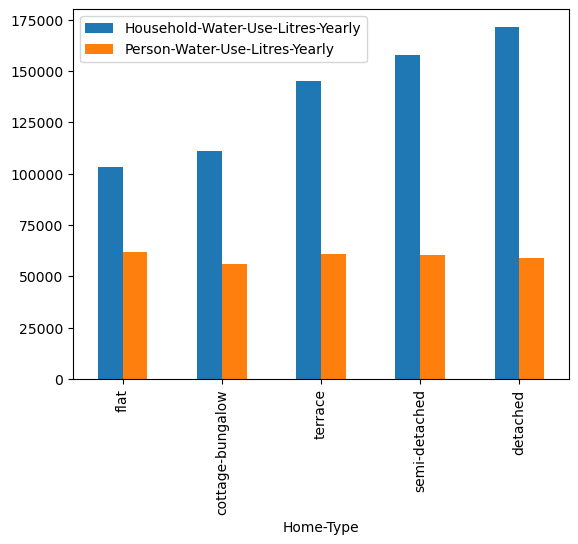

In [102]:
mean_data2.plot(kind='bar')

<AxesSubplot:xlabel='Home-Type'>

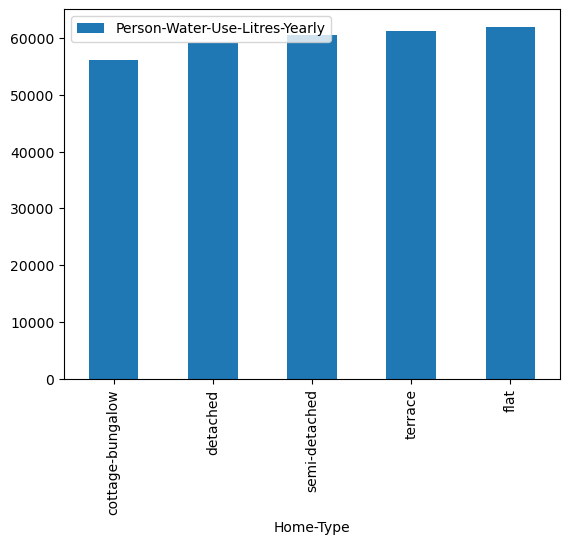

In [103]:
water_df = habit_data.groupby("Home-Type")[["Person-Water-Use-Litres-Yearly"]].mean().round()
water_df2 = water_df.sort_values("Person-Water-Use-Litres-Yearly")
water_df2.plot(kind='bar')

In [104]:
bath_df = habit_data.groupby("Number-Of-Bathtubs")[["Household-Water-Use-Litres-Yearly","Person-Water-Use-Litres-Yearly"]].mean().round()
bath_df.sort_values("Household-Water-Use-Litres-Yearly")

,Household-Water-Use-Litres-Yearly,Person-Water-Use-Litres-Yearly
Number-Of-Bathtubs,,
4,106509.0,53255.0
0,112996.0,53130.0
1,151404.0,60810.0
2,207232.0,62995.0
3,228883.0,61043.0
5,1004666.0,119758.0


<AxesSubplot:xlabel='Number-Of-Bathtubs'>

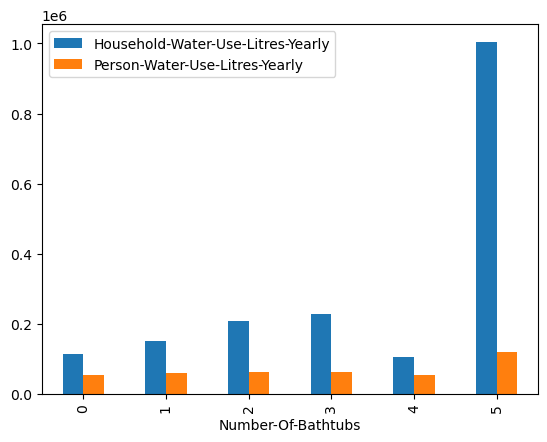

In [105]:
bath_df.plot(kind='bar')

<AxesSubplot:xlabel='Water-Garden'>

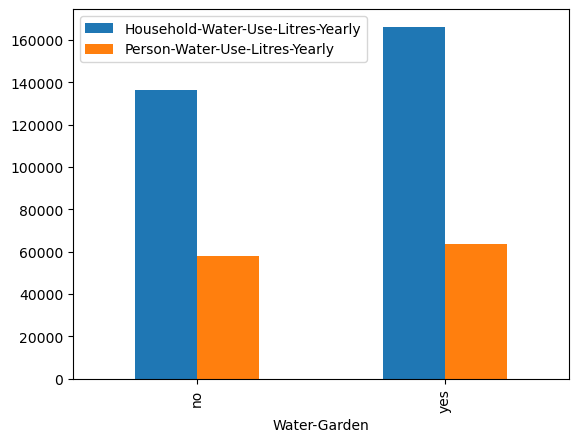

In [99]:
dishes_df = habit_data.groupby("Water-Garden")[["Household-Water-Use-Litres-Yearly", "Person-Water-Use-Litres-Yearly"]].mean().round()
dishes_df2 = dishes_df.sort_values("Household-Water-Use-Litres-Yearly")
dishes_df2.plot(kind='bar')

In [73]:
median_data = habit_data.groupby("Number-Of-People")[["Household-Water-Use-Litres-Yearly"]].mean().round()
median_data

,Household-Water-Use-Litres-Yearly
Number-Of-People,
1,71198.0
2,120146.0
3,178590.0
4,236884.0
5,280305.0
6,343213.0
7,368889.0
8,483246.0
9,426109.0


<AxesSubplot:xlabel='Number-Of-People'>

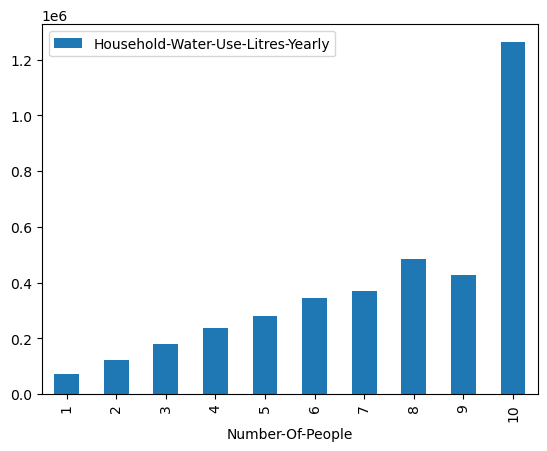

In [74]:
median_data.plot(kind='bar')